In [1]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
import warnings
warnings.filterwarnings(action='once')

from pandas import set_option
set_option("display.max_rows", None)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


In [2]:
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        "species":["ecoli"],
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_trial(trial):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

# Maltose

## G2, 1:20 Ecoli:PF

In [12]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', '

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     carbon_sources = {"cpd00179":0.2,},    
     mets_to_track = ["cpd00179","cpd00029"],
     zero_start=["cpd00029"],
       graphs = update_trial("G3"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

### forced Acetate consumption

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:98: DeprecationWarning: invalid escape sequence \_
  met_id = met_id.replace('EX_', '', 1)


Done with concentrations and biomass loops: 0.0026041666666666665 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.022395833333333334 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.10859375 min
Done exporting the content: 0.023958333333333335 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'4HB', 'stationary', 'acetate', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G3'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G3'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', 'acetate', 'malt'},
 'species': ['ecoli'],
 'trial': 'G3'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G3'}


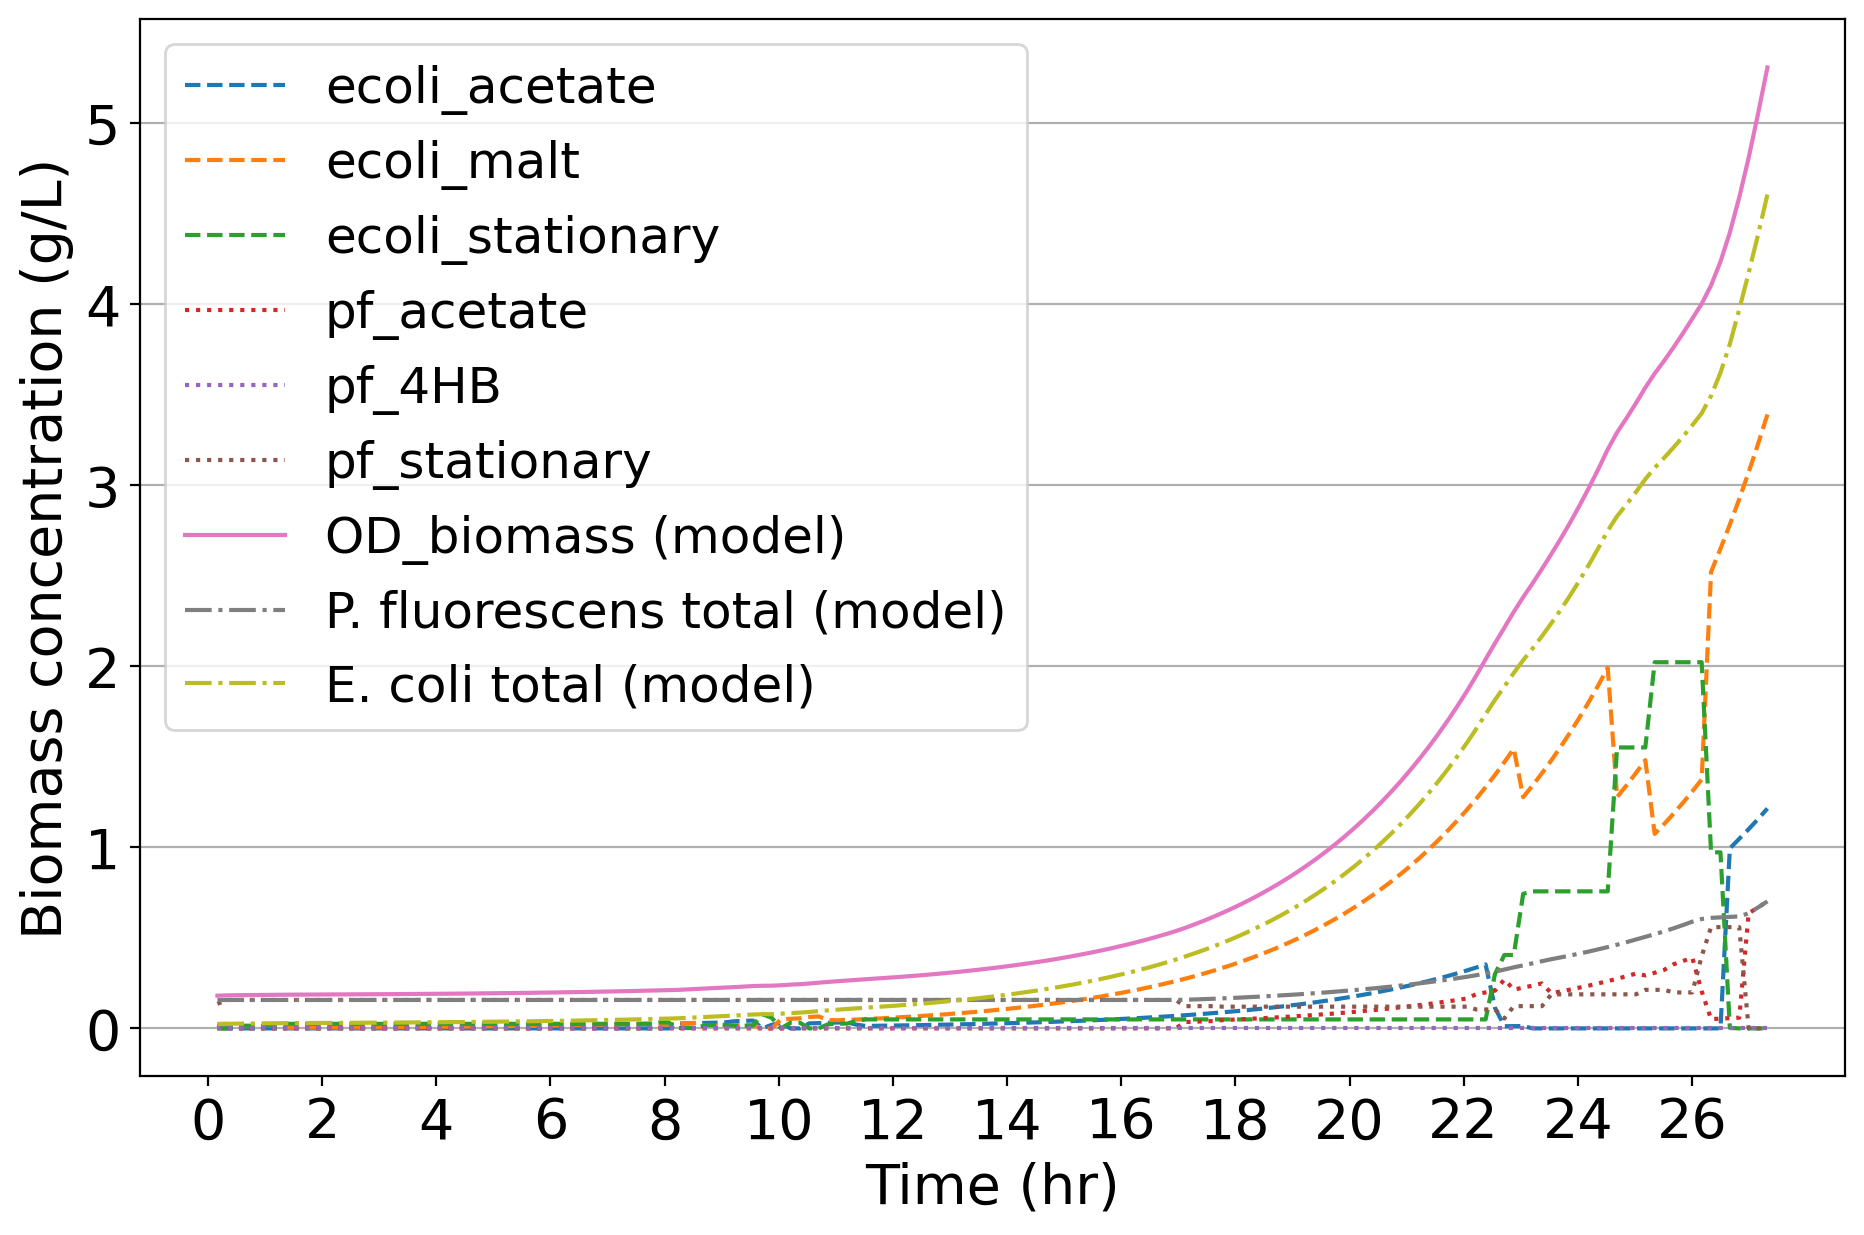

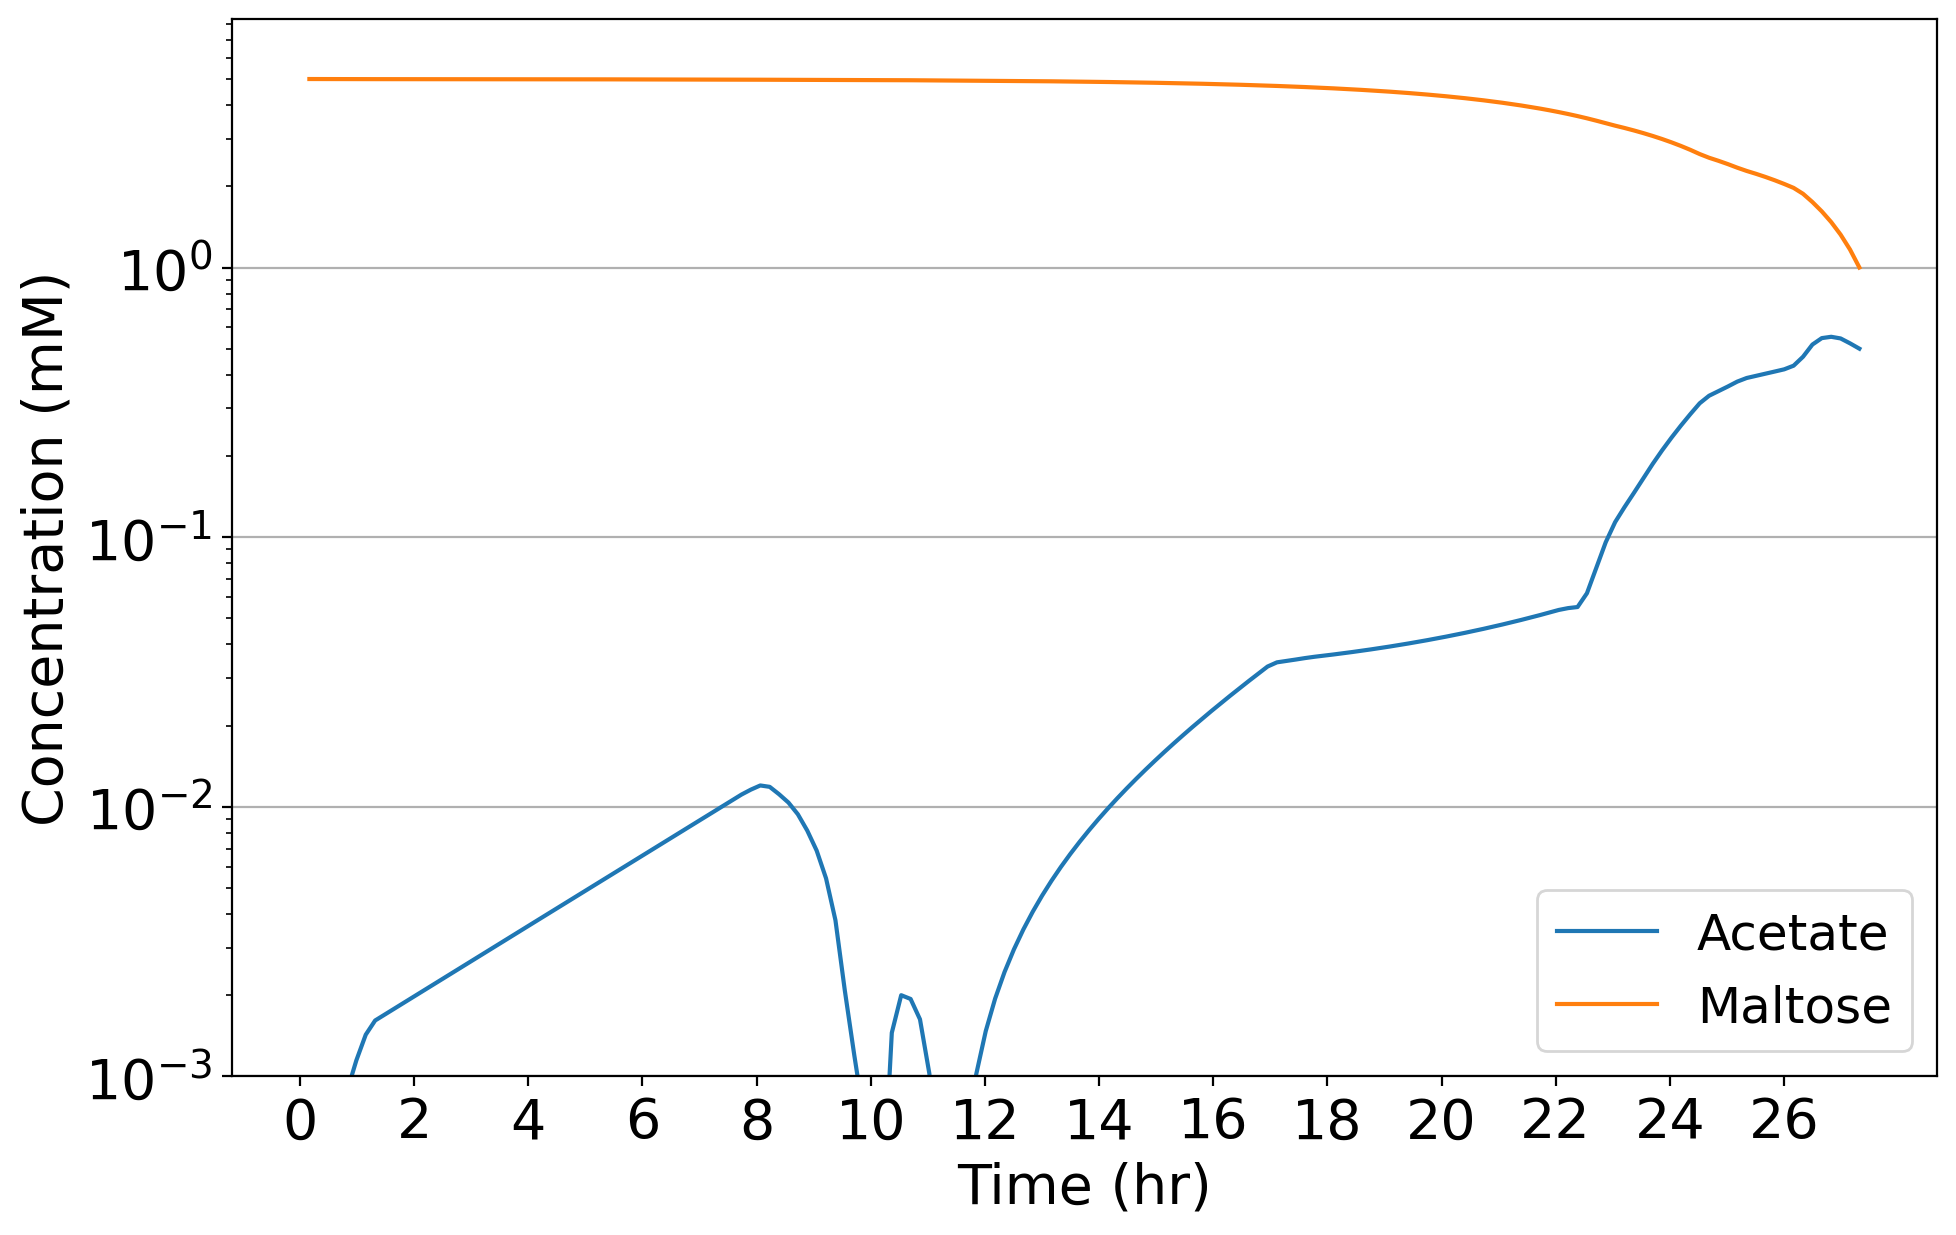

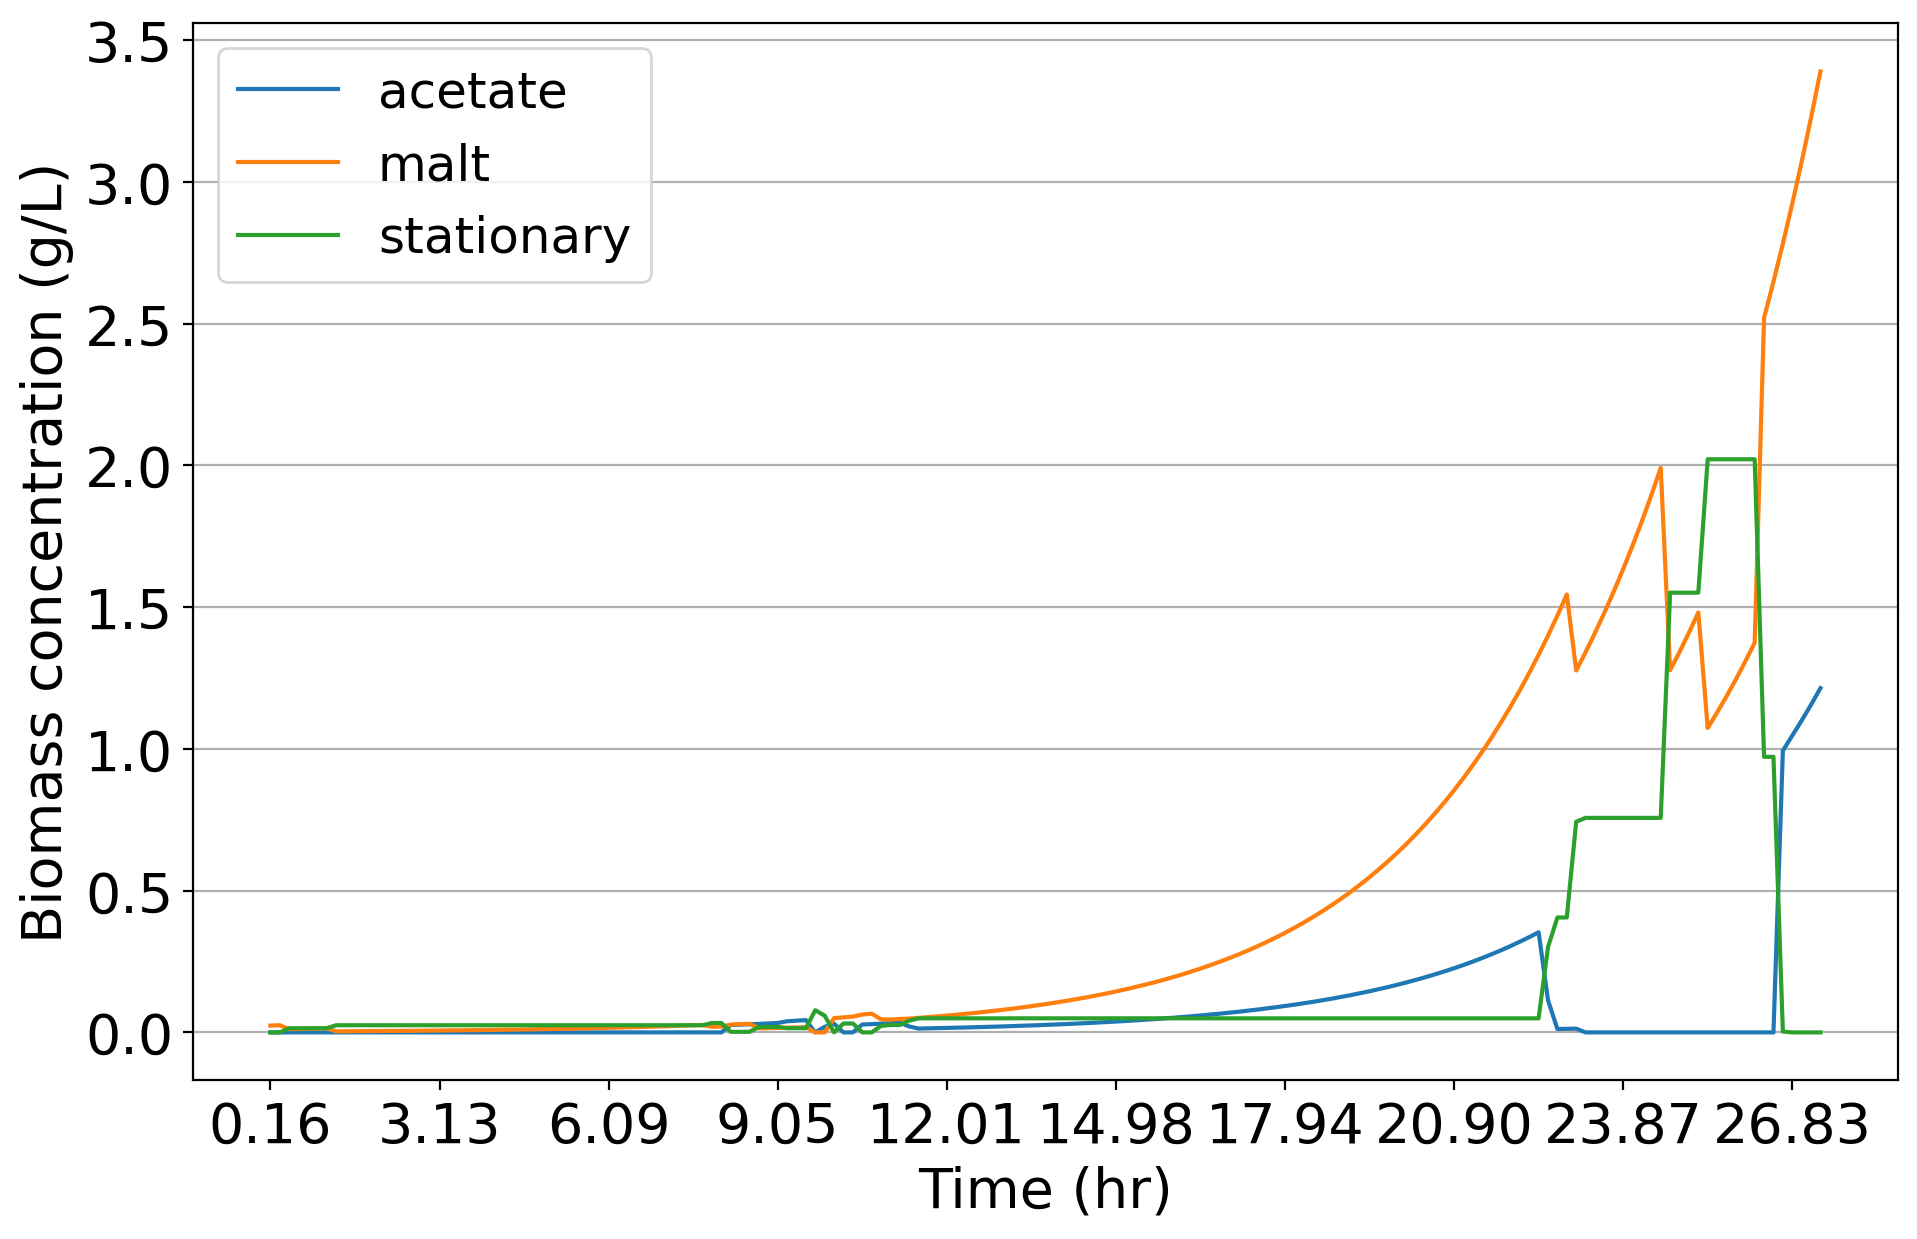

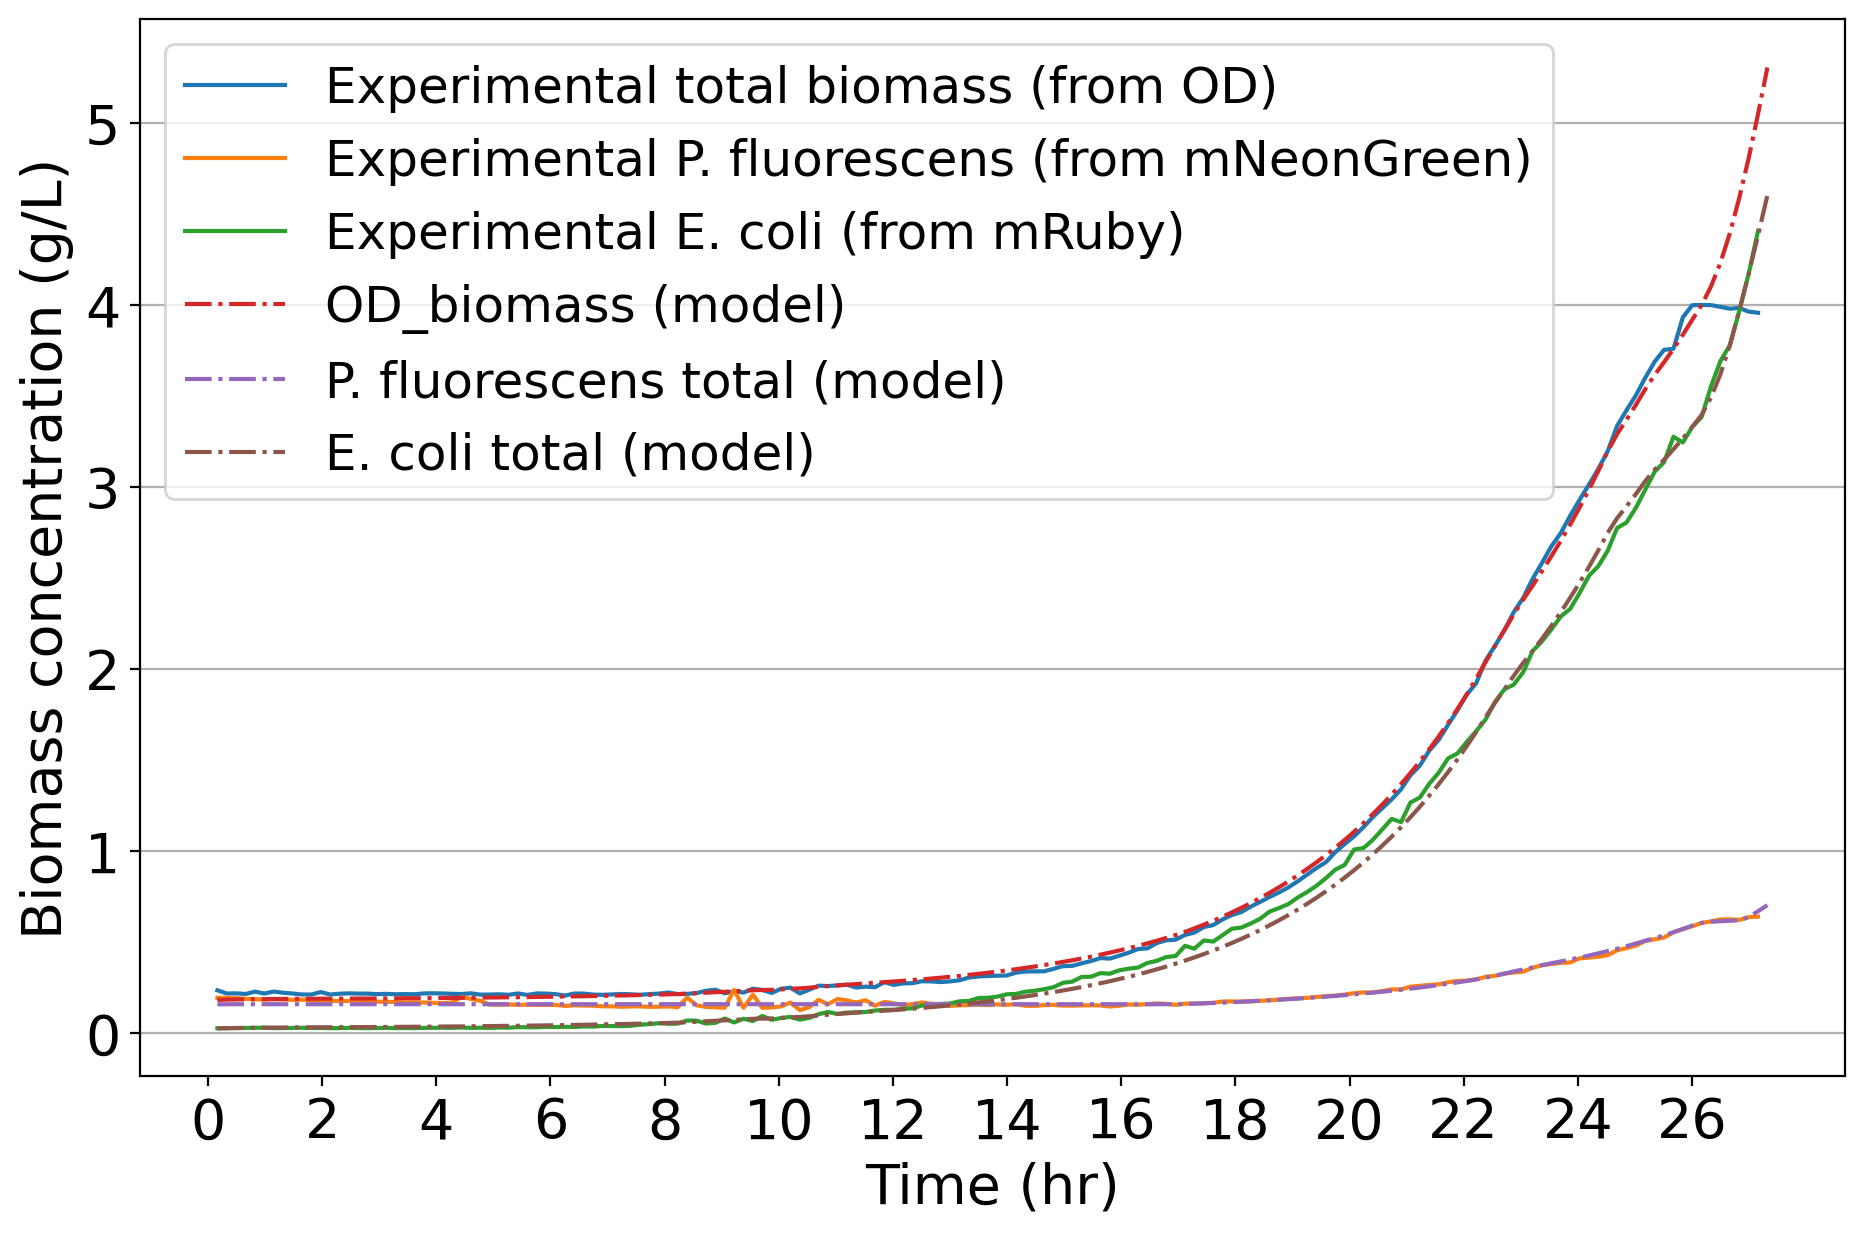

In [18]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
     mets_to_track = ["cpd00179","cpd00029"],
       graphs = update_trial("G3"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

In [11]:
display(trial_name_conversion)

{'B': {'2': ('G1', 'r1_pf-5_ecoli'),
  '3': ('G2', 'r1_ecoli_mRuby-r50_pf-5_ecoli'),
  '4': ('G3', 'r1_ecoli_mRuby-r20_pf-5_ecoli'),
  '5': ('G4', 'r1_ecoli_mRuby-r10_pf-5_ecoli'),
  '6': ('G5', 'r1_ecoli_mRuby-r3_pf-5_ecoli'),
  '7': ('G6', 'r1_ecoli_mRuby-r1_pf-5_ecoli'),
  '8': ('G7', 'r3_ecoli_mRuby-r1_pf-5_ecoli'),
  '9': ('G8', 'r10_ecoli_mRuby-r1_pf-5_ecoli'),
  '10': ('G9', 'r20_ecoli_mRuby-r1_pf-5_ecoli'),
  '11': ('G10', 'r1_ecoli_mRuby-5_ecoli'),
  '12': ('G11', '5_ecoli')},
 'C': {'2': ('G12', 'r1_pf-5_ecoli'),
  '3': ('G13', 'r1_ecoli_ACS-r50_pf-5_ecoli'),
  '4': ('G14', 'r1_ecoli_ACS-r20_pf-5_ecoli'),
  '5': ('G15', 'r1_ecoli_ACS-r10_pf-5_ecoli'),
  '6': ('G16', 'r1_ecoli_ACS-r3_pf-5_ecoli'),
  '7': ('G17', 'r1_ecoli_ACS-r1_pf-5_ecoli'),
  '8': ('G18', 'r3_ecoli_ACS-r1_pf-5_ecoli'),
  '9': ('G19', 'r10_ecoli_ACS-r1_pf-5_ecoli'),
  '10': ('G20', 'r20_ecoli_ACS-r1_pf-5_ecoli'),
  '11': ('G21', 'r1_ecoli_ACS-5_ecoli'),
  '12': ('G22', '5_ecoli')},
 'D': {'2': ('G23', 'r1_pf-

In [12]:
display(experimental_metadata)

,trial_IDs,short_code,base_media,additional_compounds,strains,date
0,r1_pf-5_ecoli,G1,93465/19/1,cpd00179:5:5,ecoli_mRuby:r0;pf:r1,"Apr 29, 22"
1,r1_ecoli_mRuby-r50_pf-5_ecoli,G2,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r50,"Apr 29, 22"
2,r1_ecoli_mRuby-r20_pf-5_ecoli,G3,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r20,"Apr 29, 22"
3,r1_ecoli_mRuby-r10_pf-5_ecoli,G4,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r10,"Apr 29, 22"
4,r1_ecoli_mRuby-r3_pf-5_ecoli,G5,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r3,"Apr 29, 22"
5,r1_ecoli_mRuby-r1_pf-5_ecoli,G6,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r1,"Apr 29, 22"
6,r3_ecoli_mRuby-r1_pf-5_ecoli,G7,93465/19/1,cpd00179:5:5,ecoli_mRuby:r3;pf:r1,"Apr 29, 22"
7,r10_ecoli_mRuby-r1_pf-5_ecoli,G8,93465/19/1,cpd00179:5:5,ecoli_mRuby:r10;pf:r1,"Apr 29, 22"
8,r20_ecoli_mRuby-r1_pf-5_ecoli,G9,93465/19/1,cpd00179:5:5,ecoli_mRuby:r20;pf:r1,"Apr 29, 22"
9,r1_ecoli_mRuby-5_ecoli,G10,93465/19/1,cpd00179:5:5,ecoli_mRuby:r1;pf:r0,"Apr 29, 22"


### G6, with 1:1 Ecoli:PF

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', '

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:97: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0018229166666666667 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.0049479166666666664 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.11328125 min
Done exporting the content: 0.023697916666666666 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'stationary', '4HB', 'acetate'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G6'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'stationary', 'acetate'},
 'species': ['ecoli'],
 'trial': 'G6'}


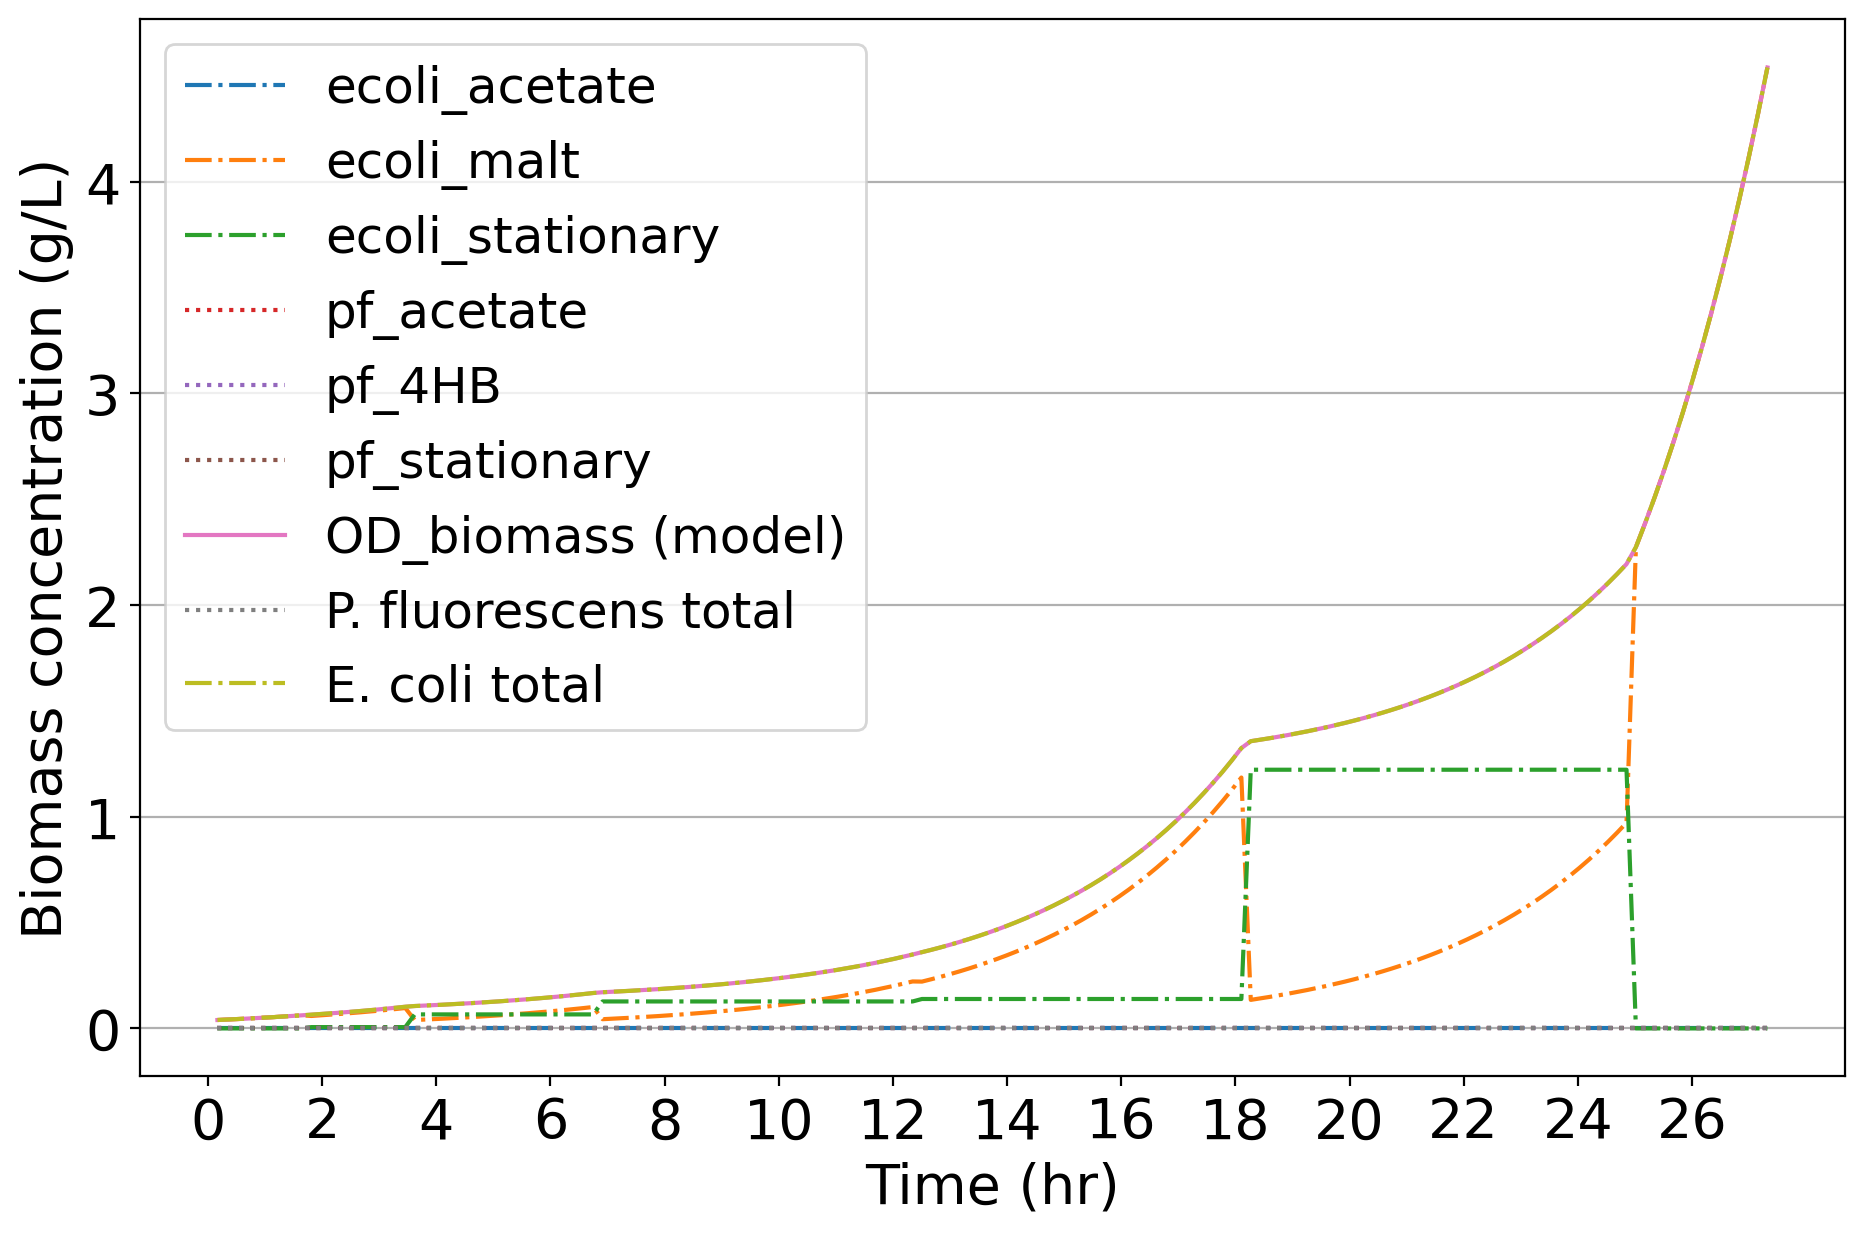

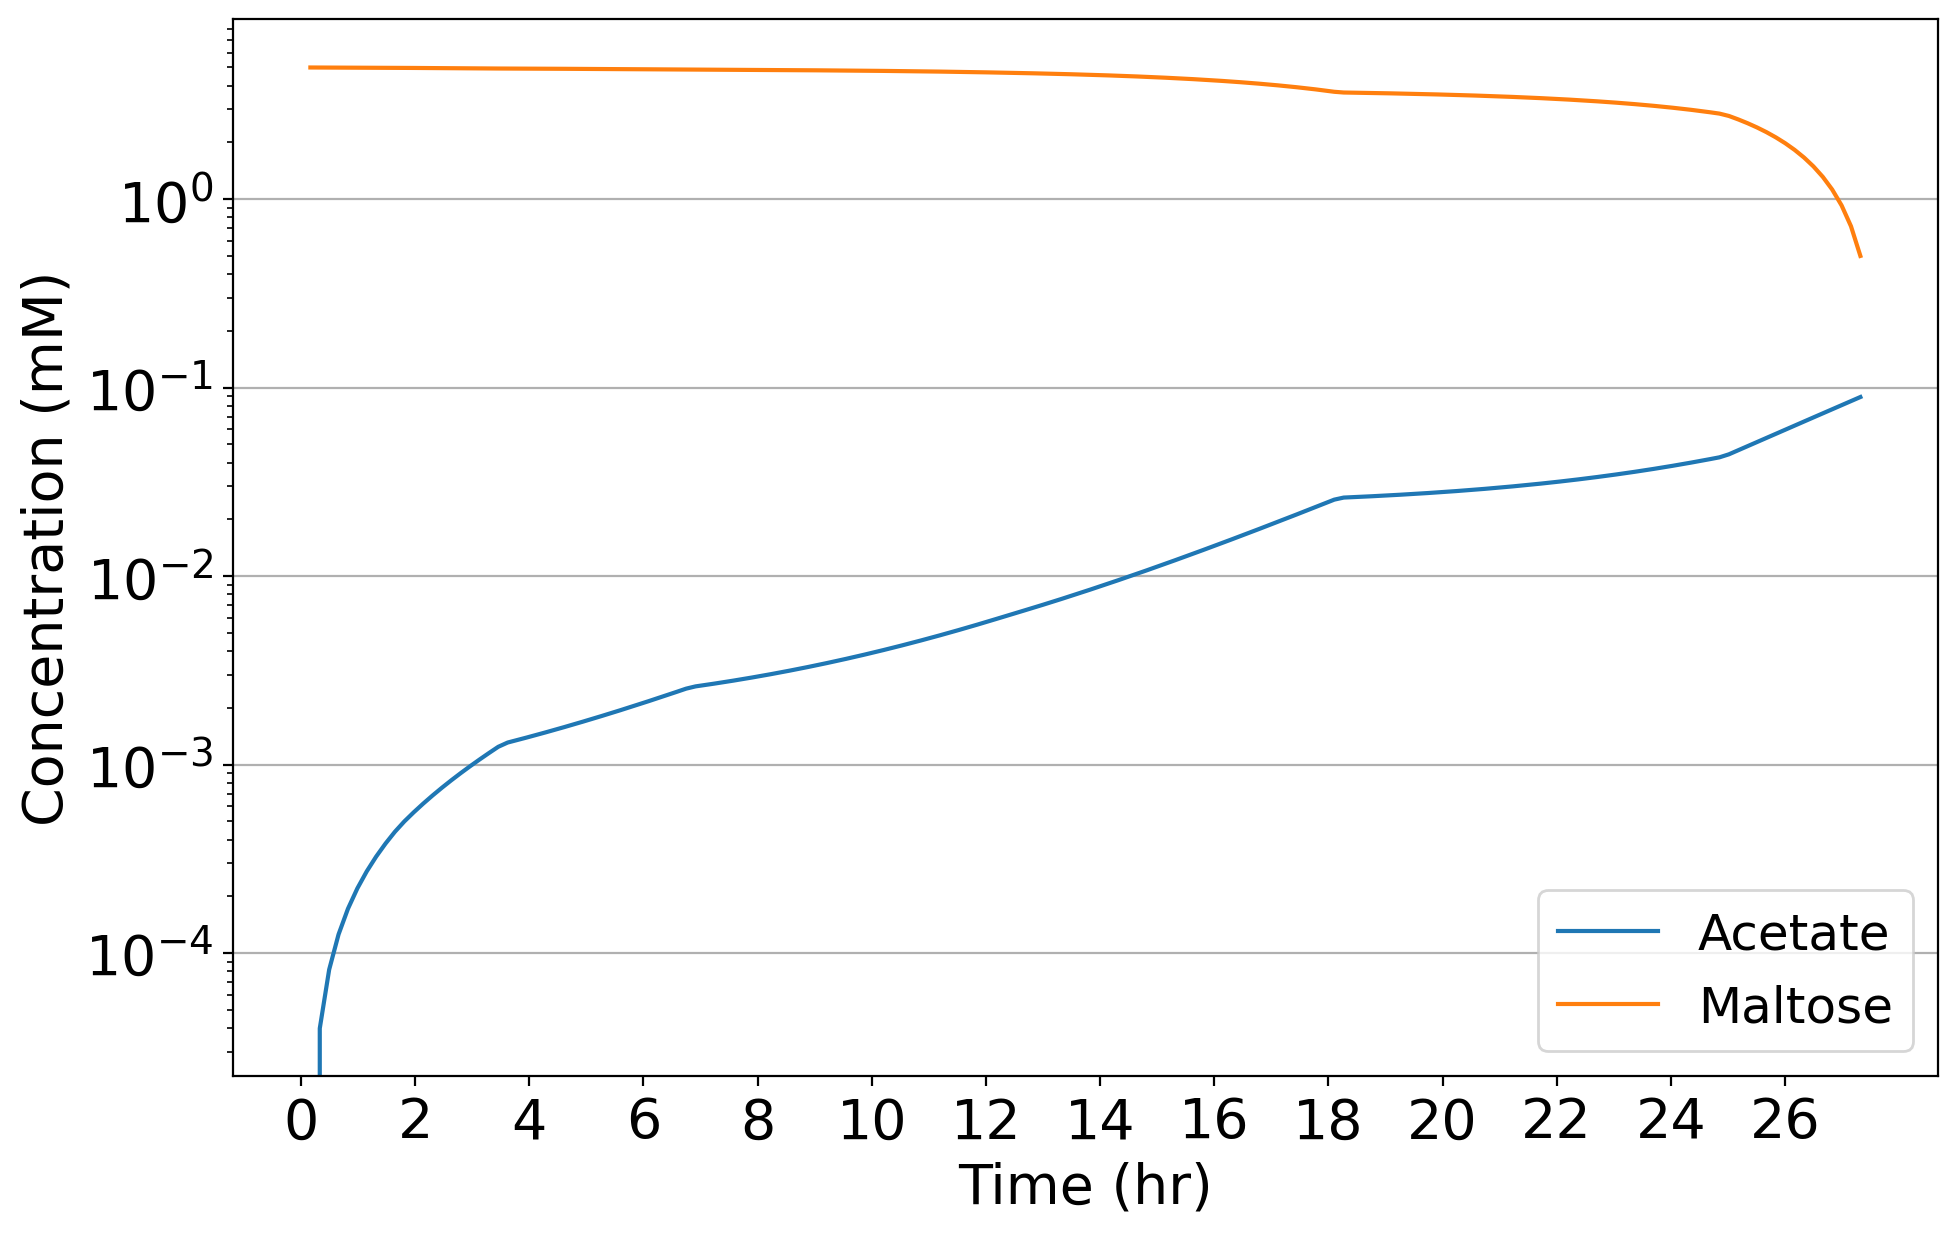

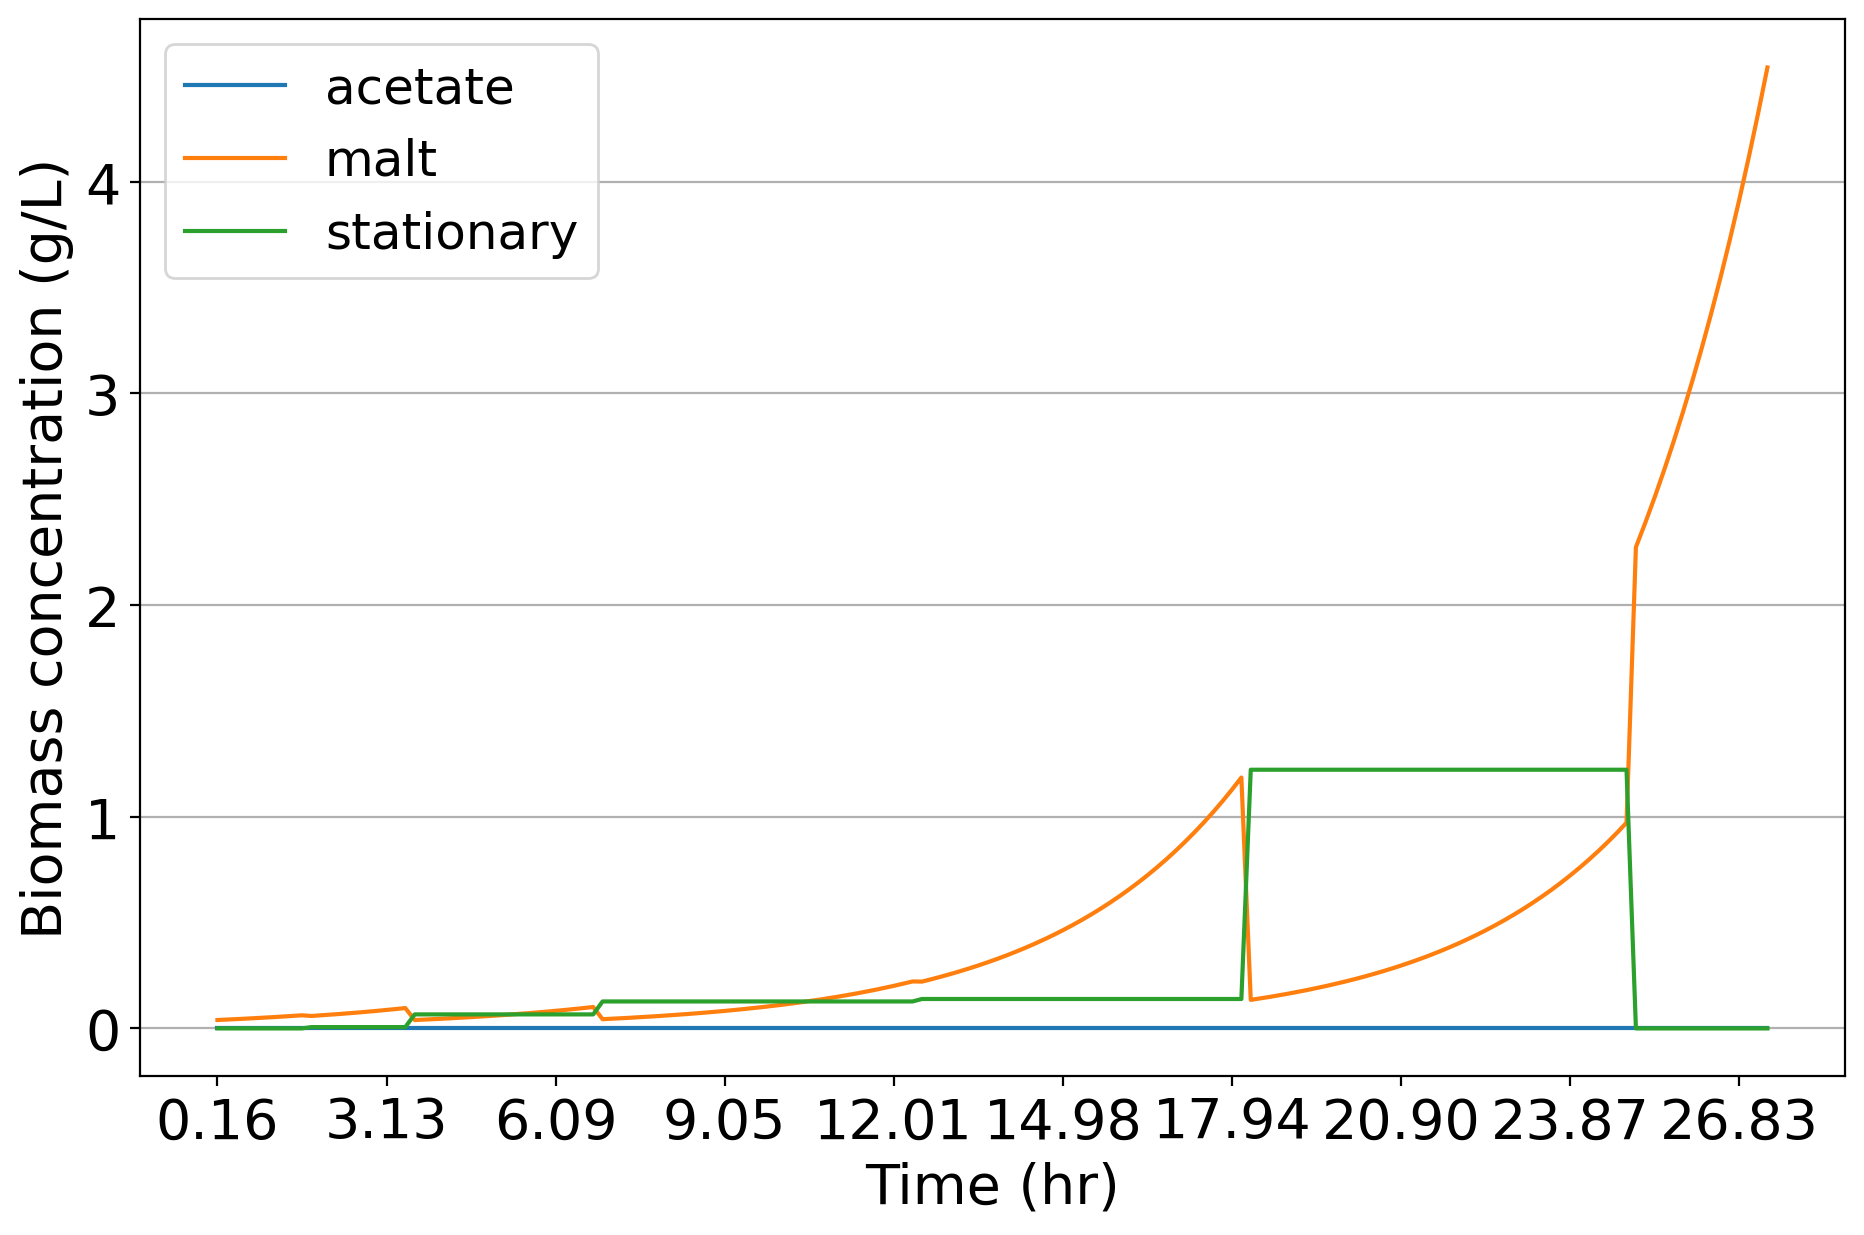

In [4]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     final_rel_c12_conc = 0.1,
     mets_to_track = ["cpd00179","cpd00029"],
     zero_start=["cpd00029"],
       graphs = [
            {
                'trial':'G6',
                "phenotype": '*',
                'content': 'biomass',
                'experimental_data': False
            },
            {
                'trial':'G6',
                'content': "conc",
            },
            {
                'trial':'G6',
                "phenotype": '*',
                "species":["ecoli"],
                'content': 'biomass'
            }
        ], 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

### G2, 1:50 Ecoli:PF

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B4', '

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


ValueError: All arrays must be of the same length

### G4, 1:10 Ecoli:PF

In [8]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B4', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B4', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', '

### forced consumption of Acetate

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:98: DeprecationWarning: invalid escape sequence \_
  met_id = met_id.replace('EX_', '', 1)


Done with concentrations and biomass loops: 0.00234375 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.0049479166666666664 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.10208333333333333 min
Done exporting the content: 0.03723958333333333 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'4HB', 'stationary', 'acetate', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G4'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', 'acetate', 'malt'},
 'species': ['ecoli'],
 'trial': 'G4'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}


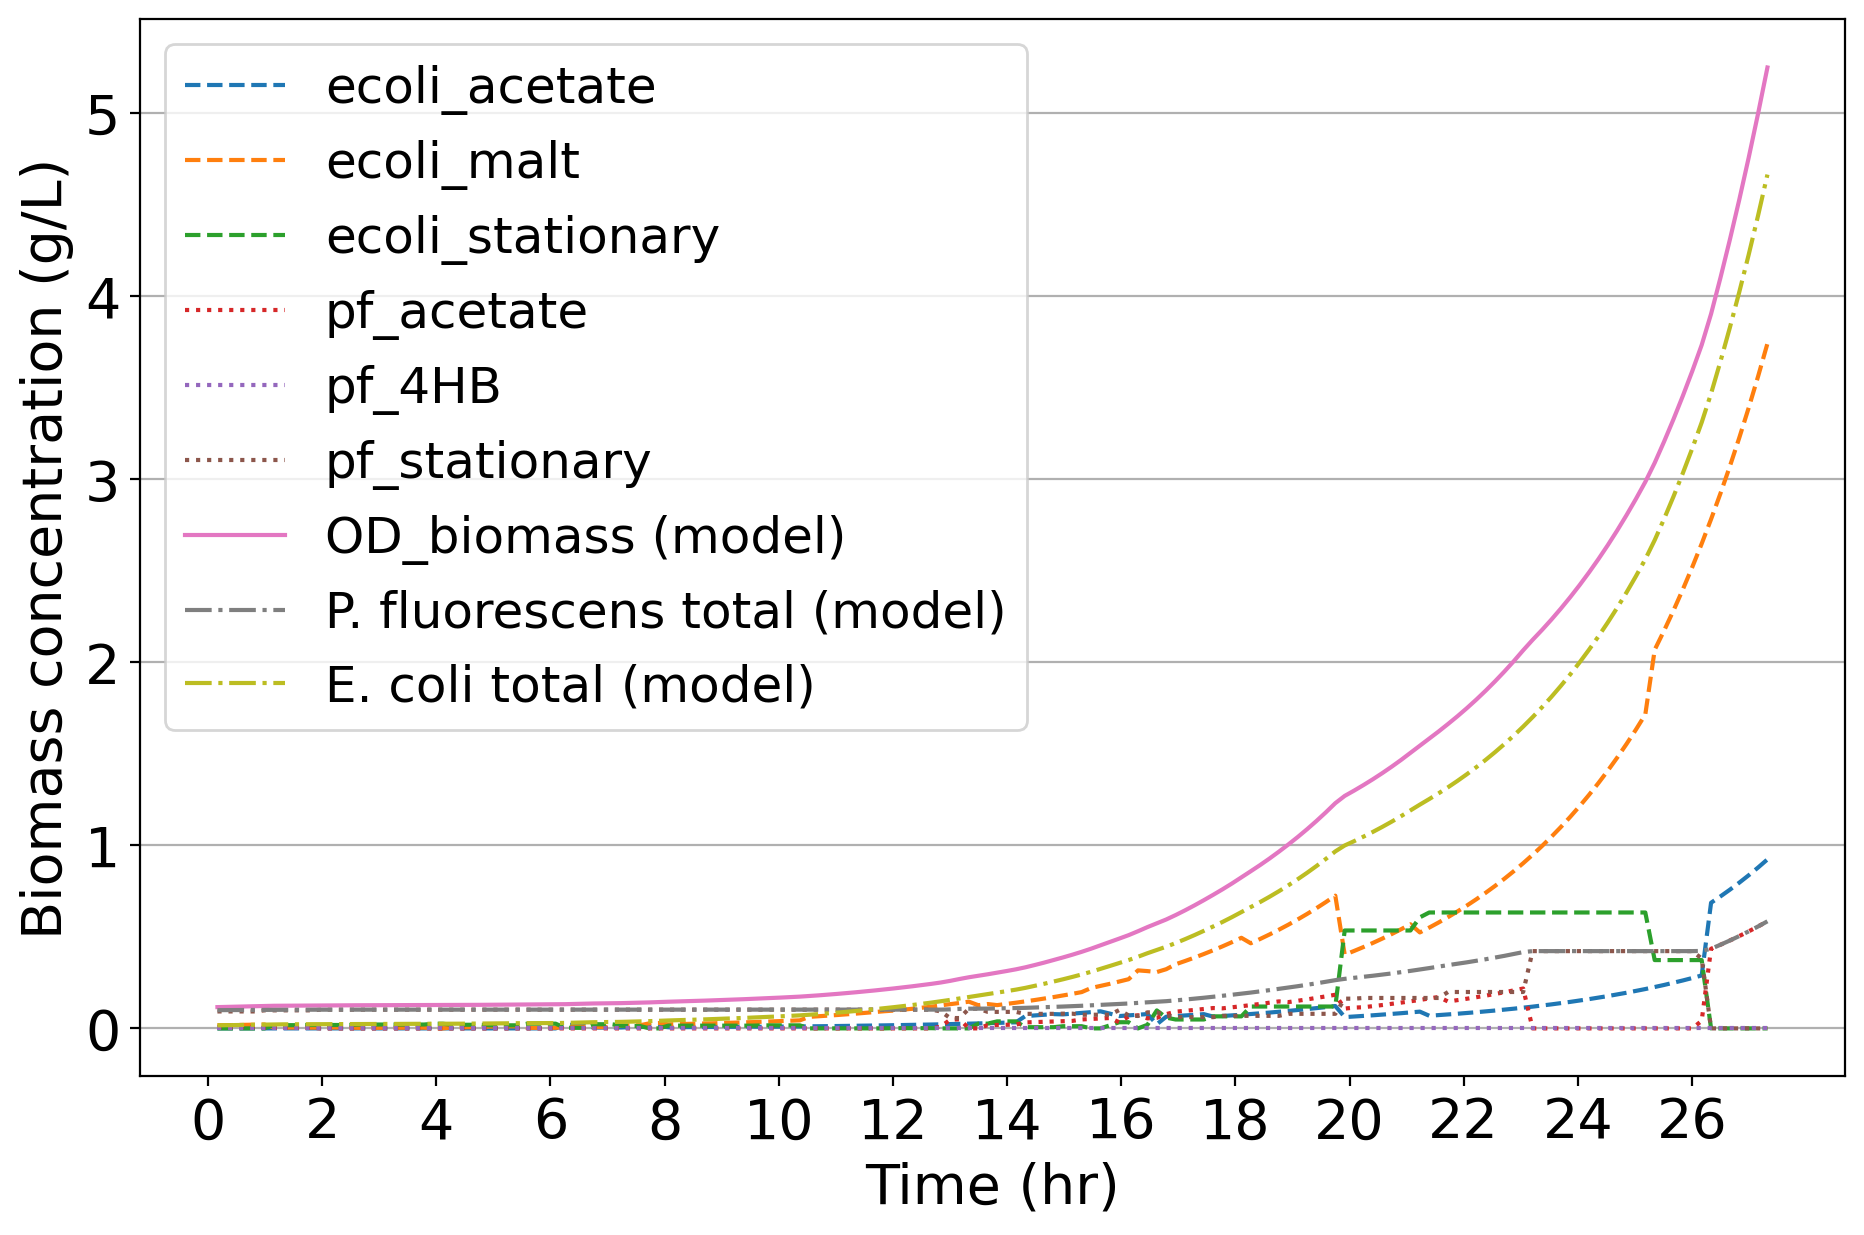

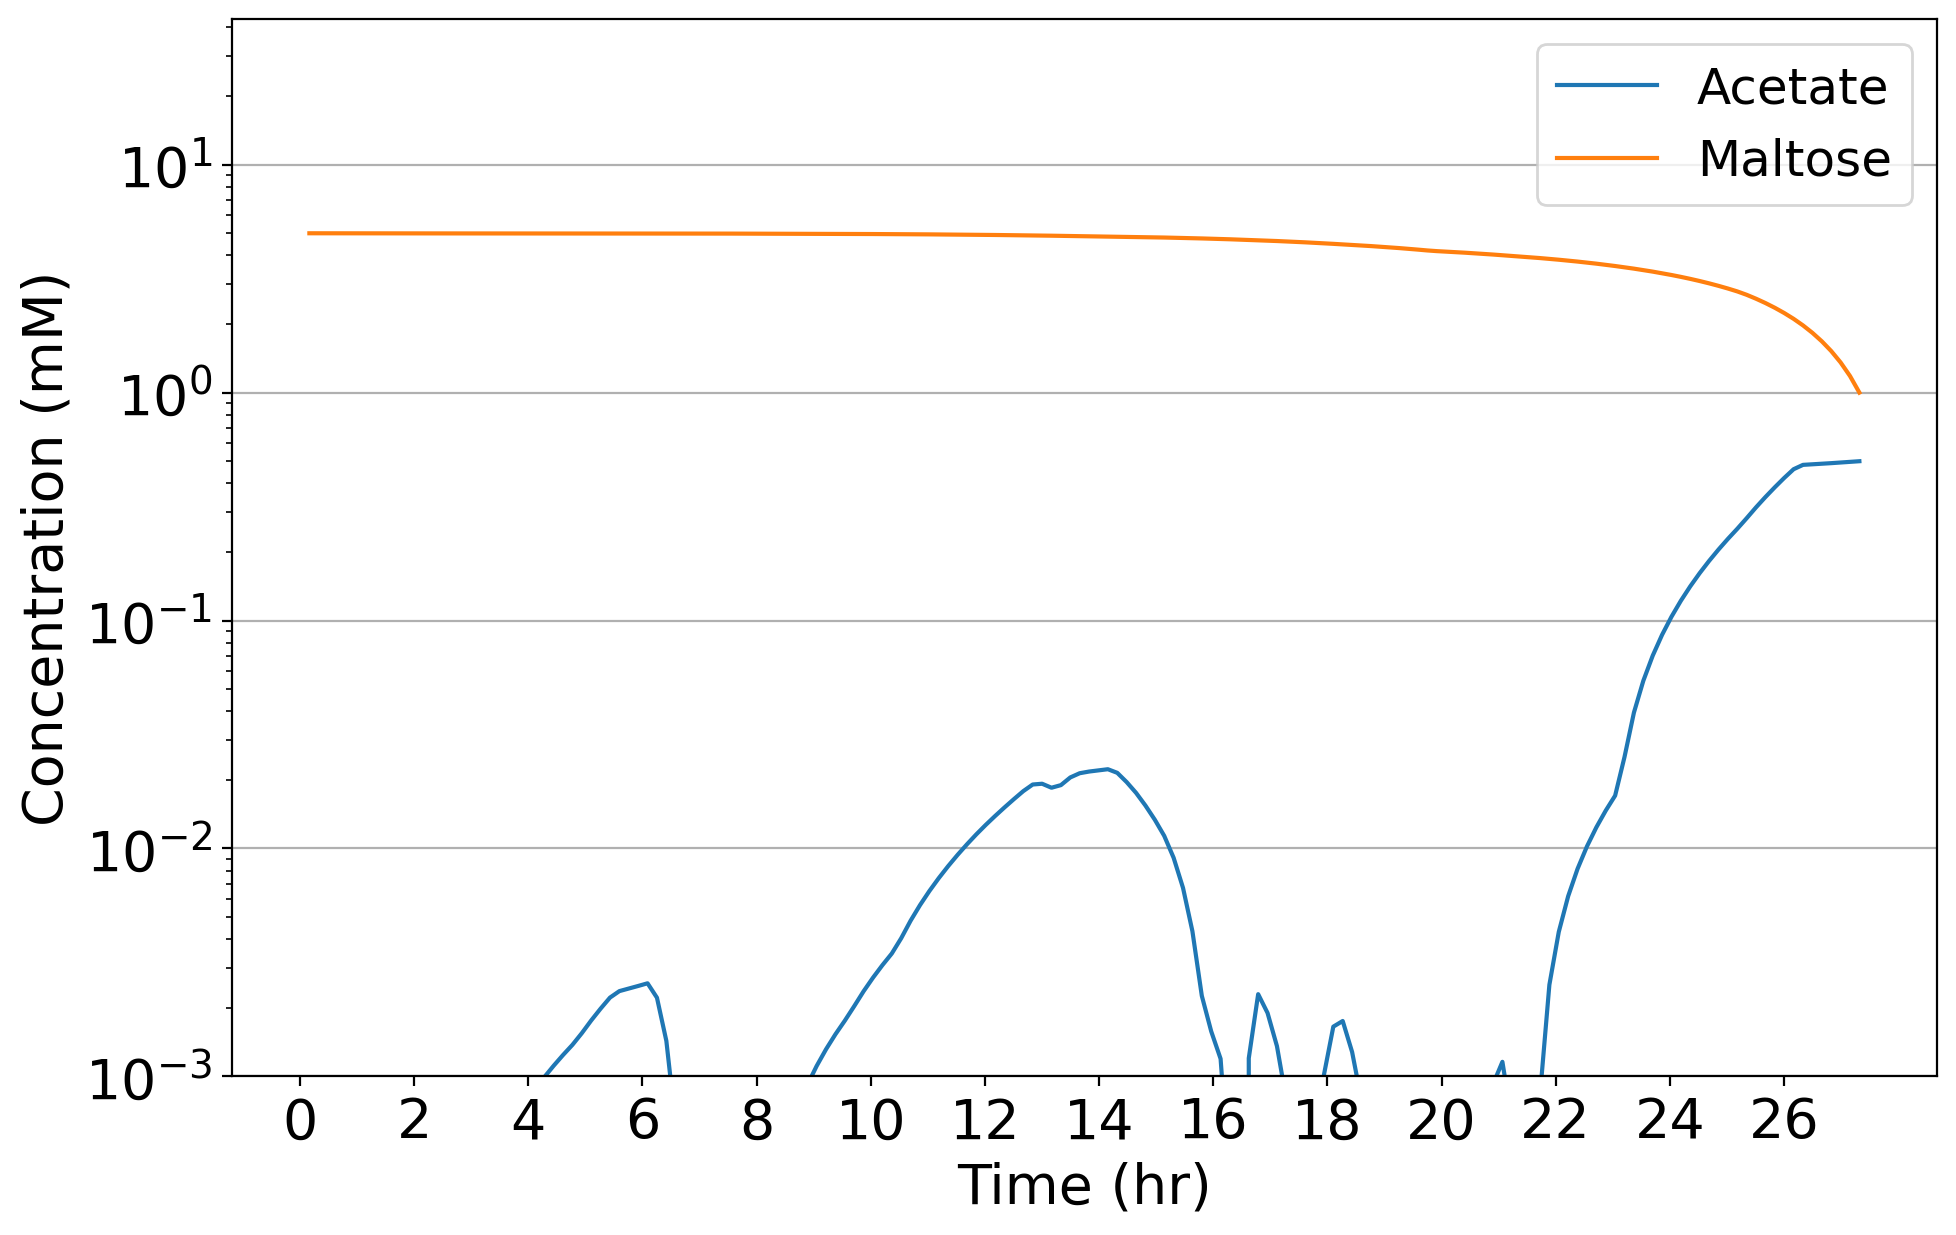

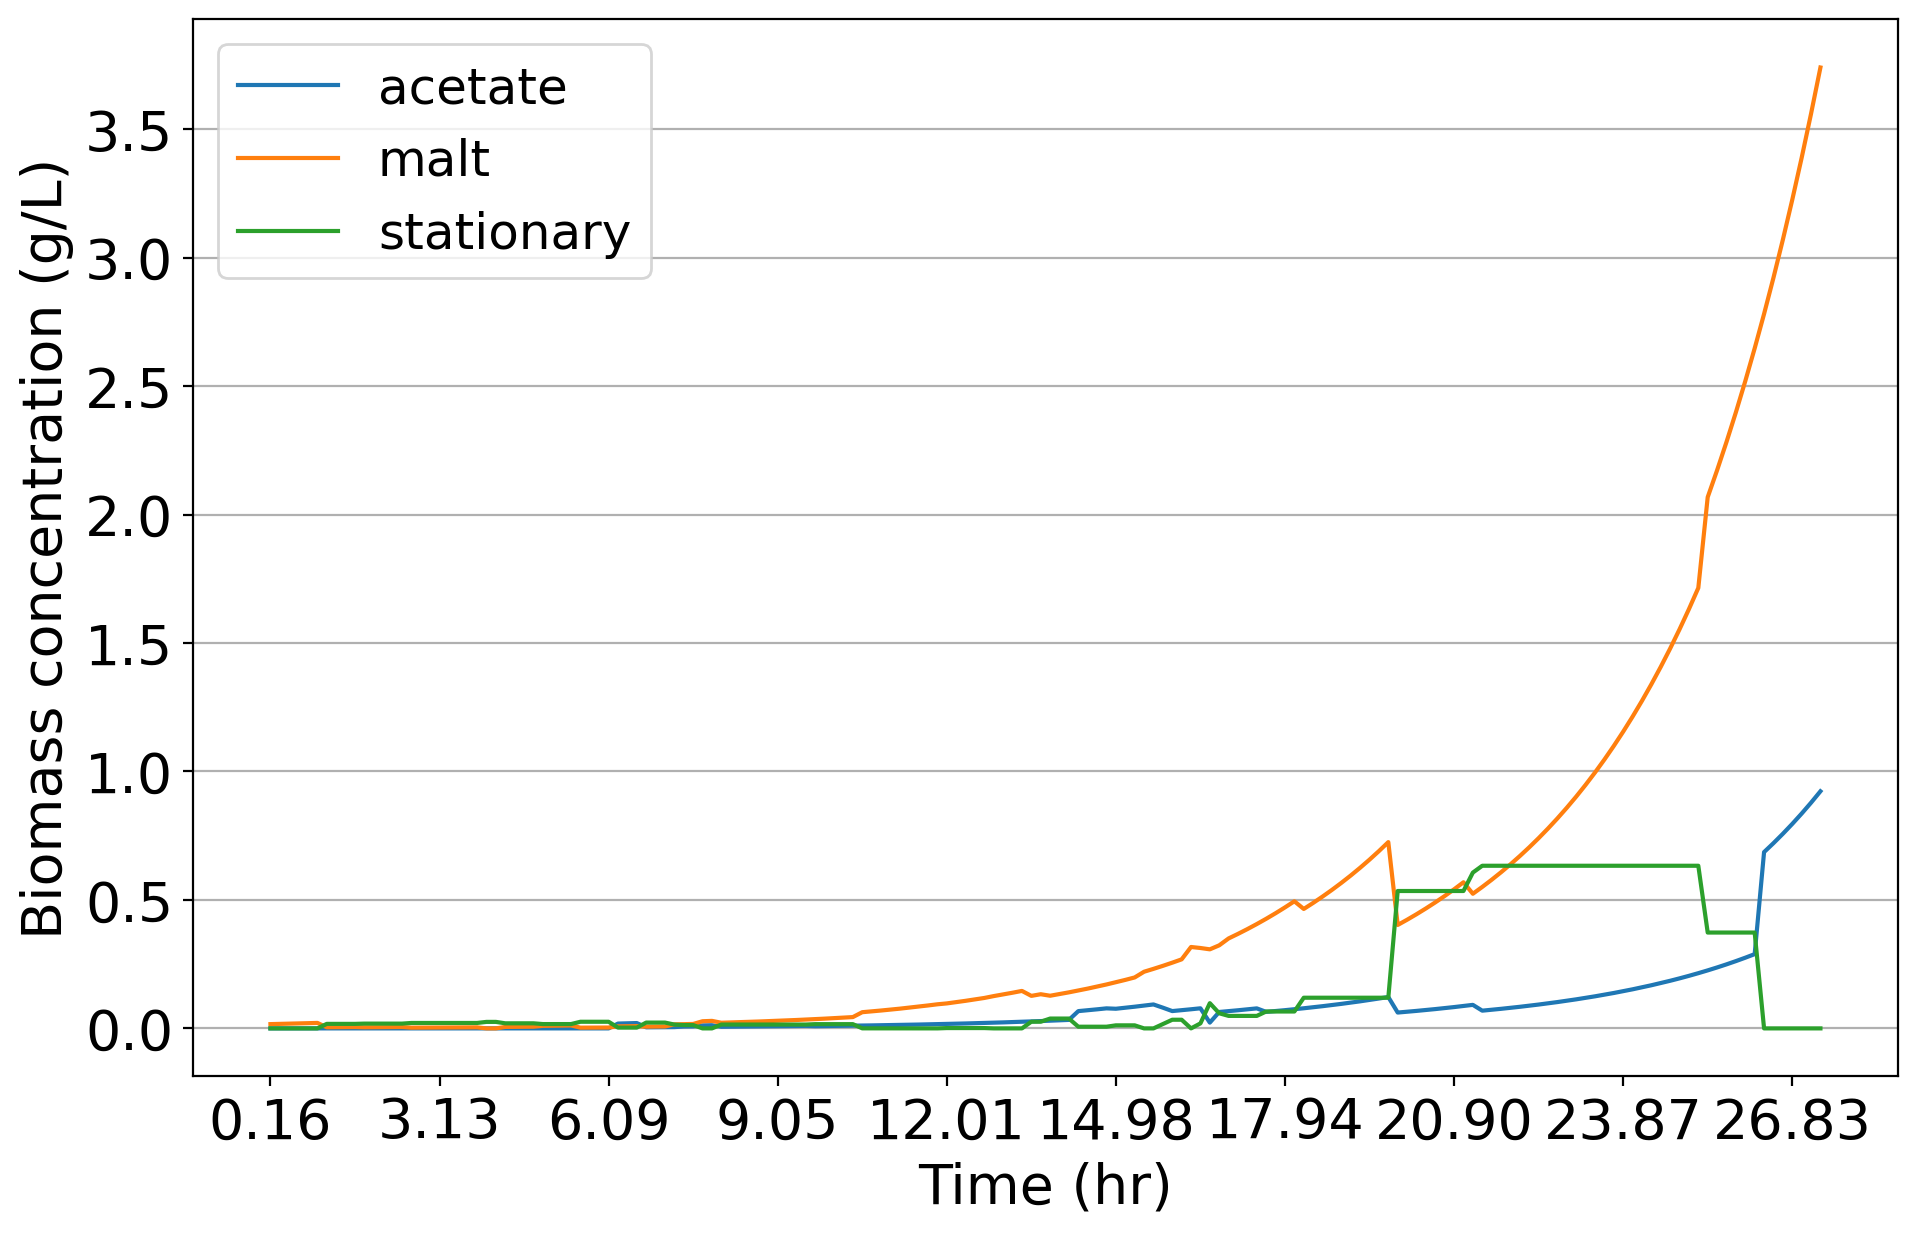

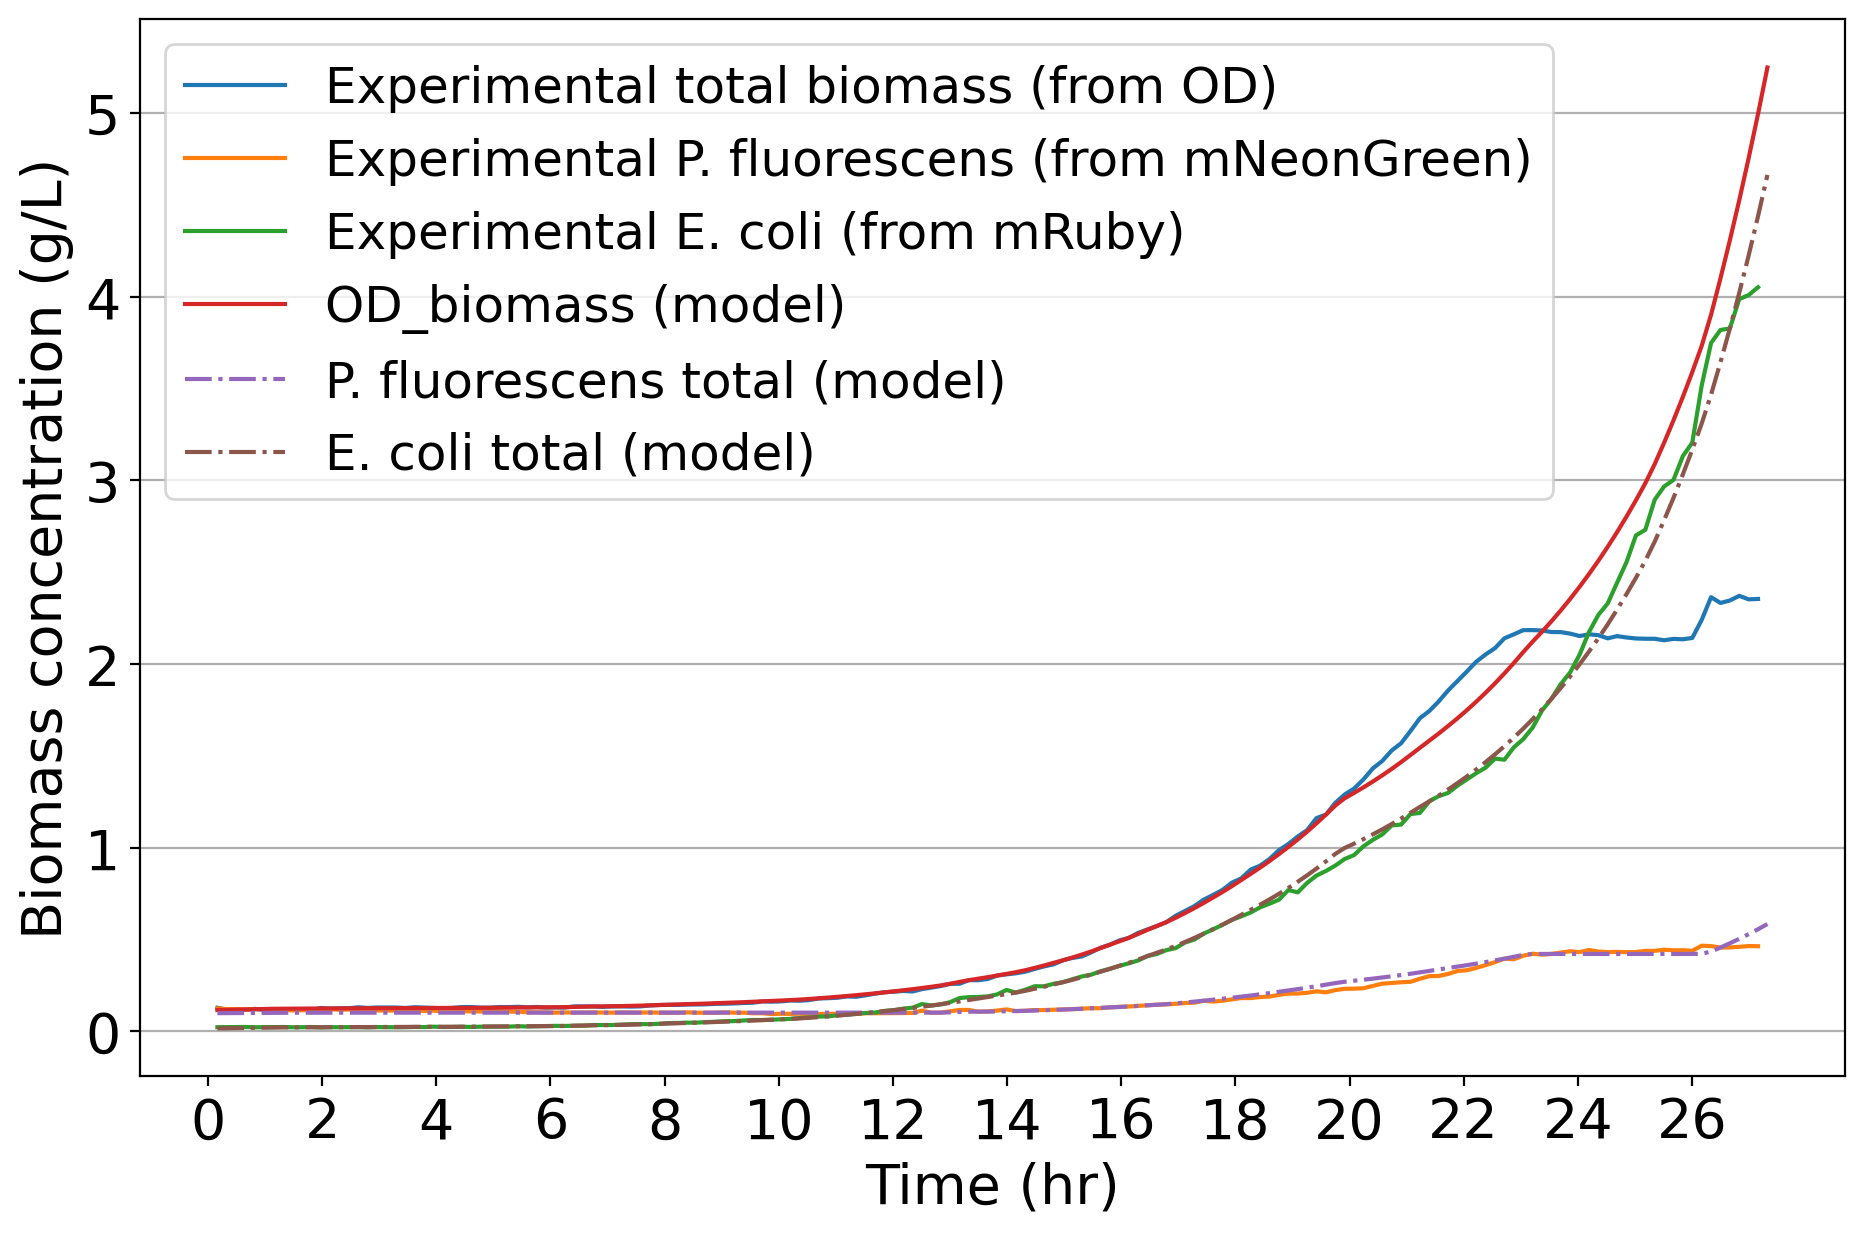

In [11]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_trial("G4"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:97: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0020833333333333333 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.00390625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.12604166666666666 min
Done exporting the content: 0.0171875 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'acetate', 'stationary', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G4'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'acetate', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G4'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}


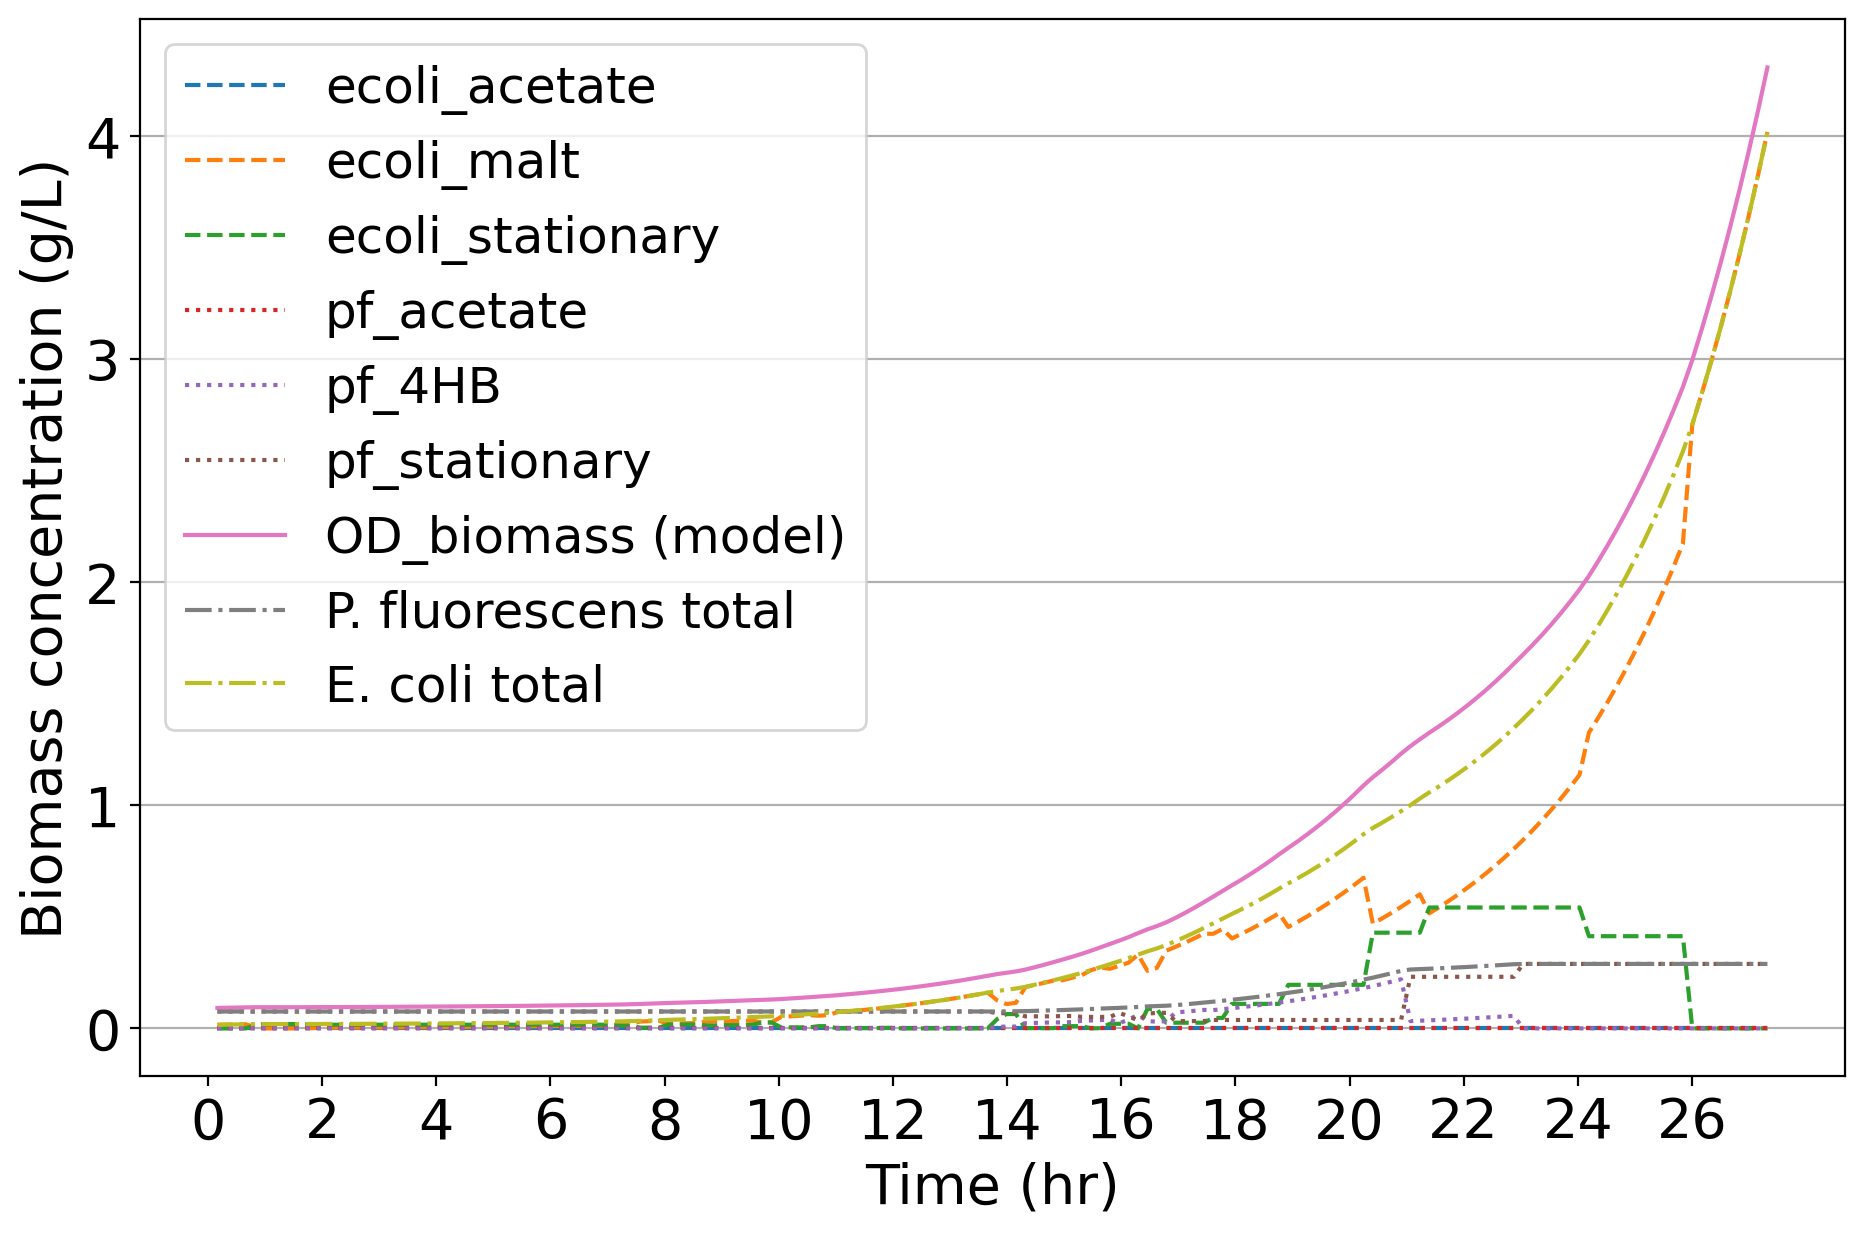

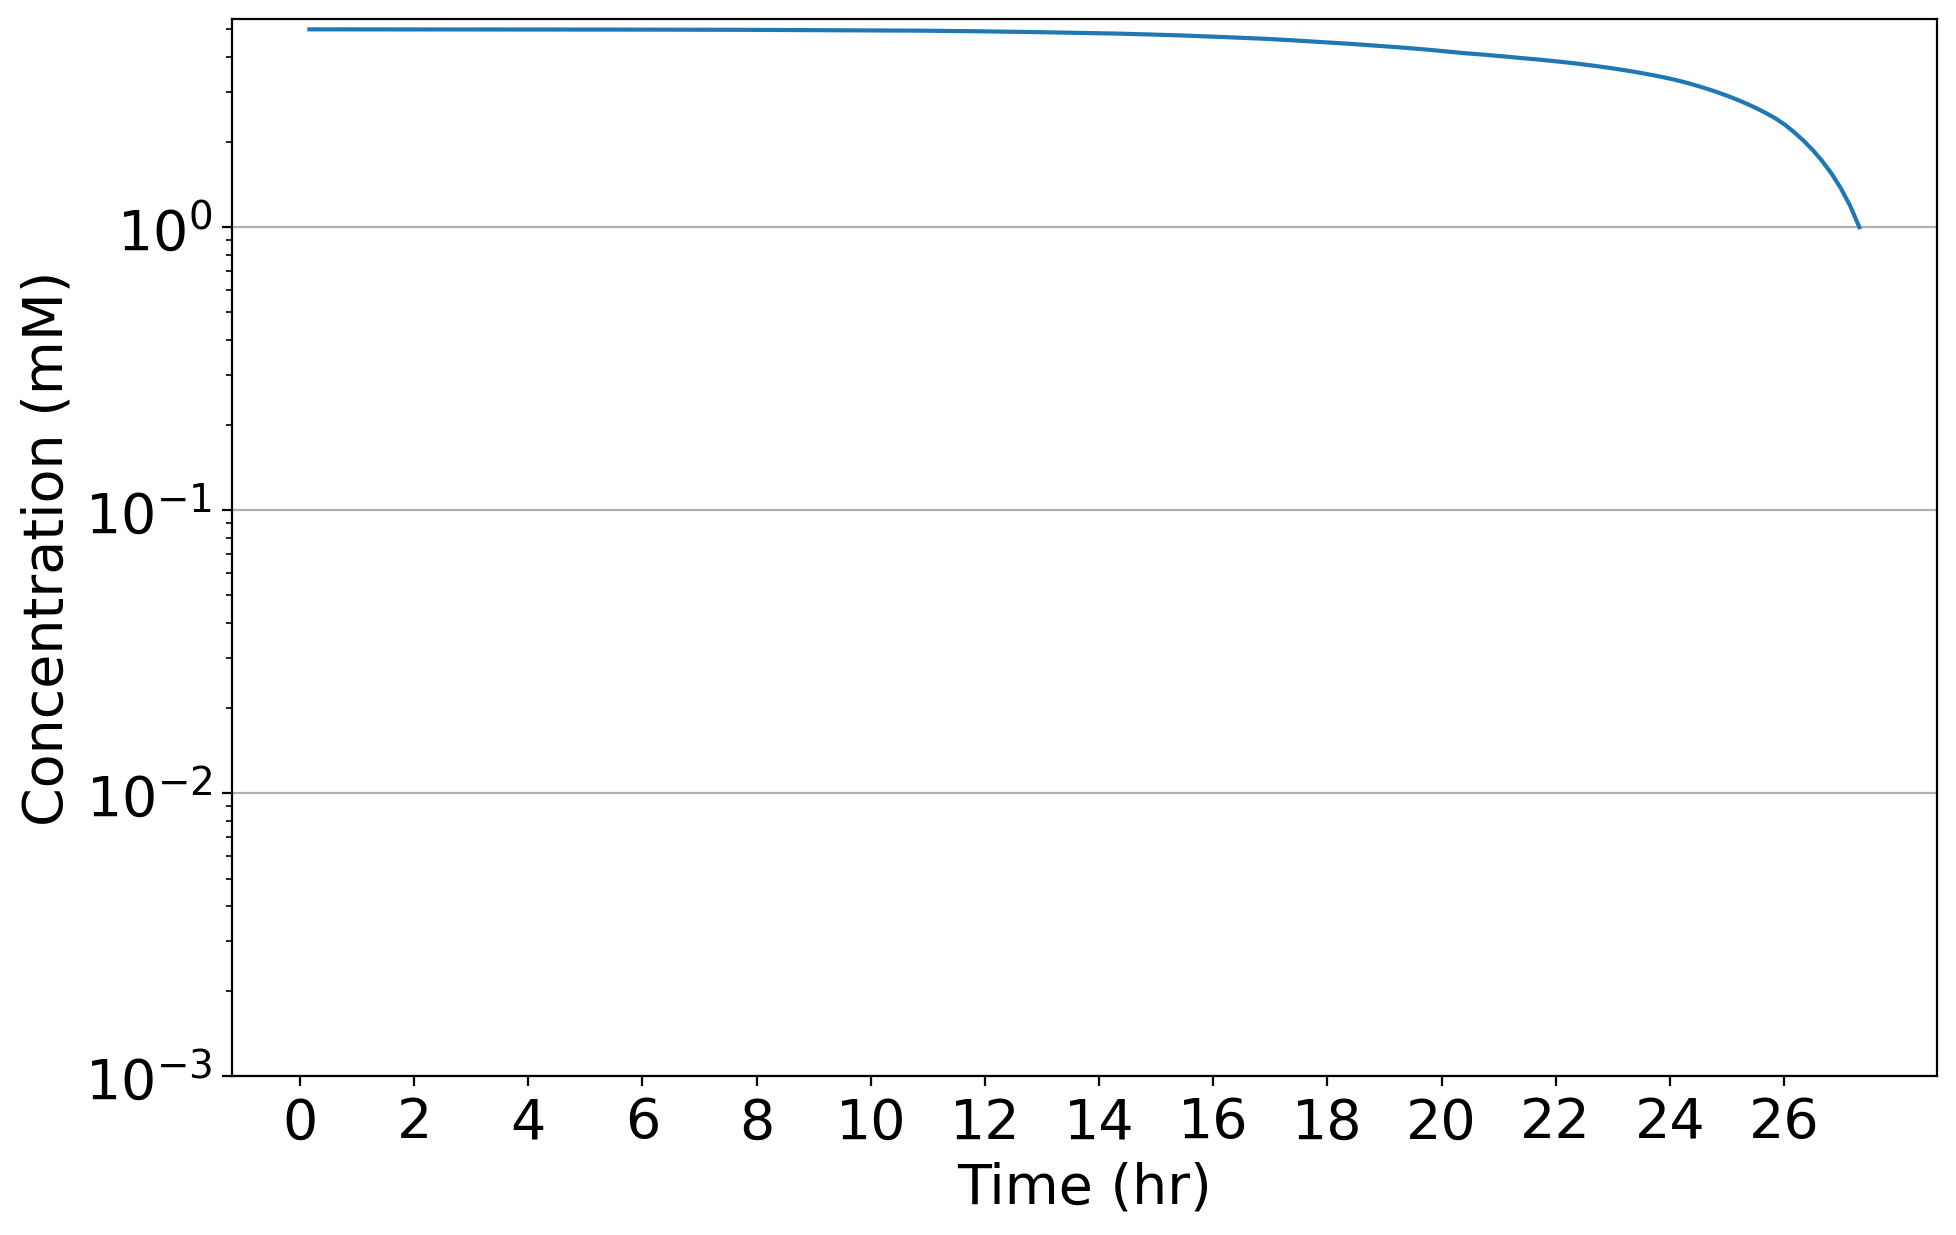

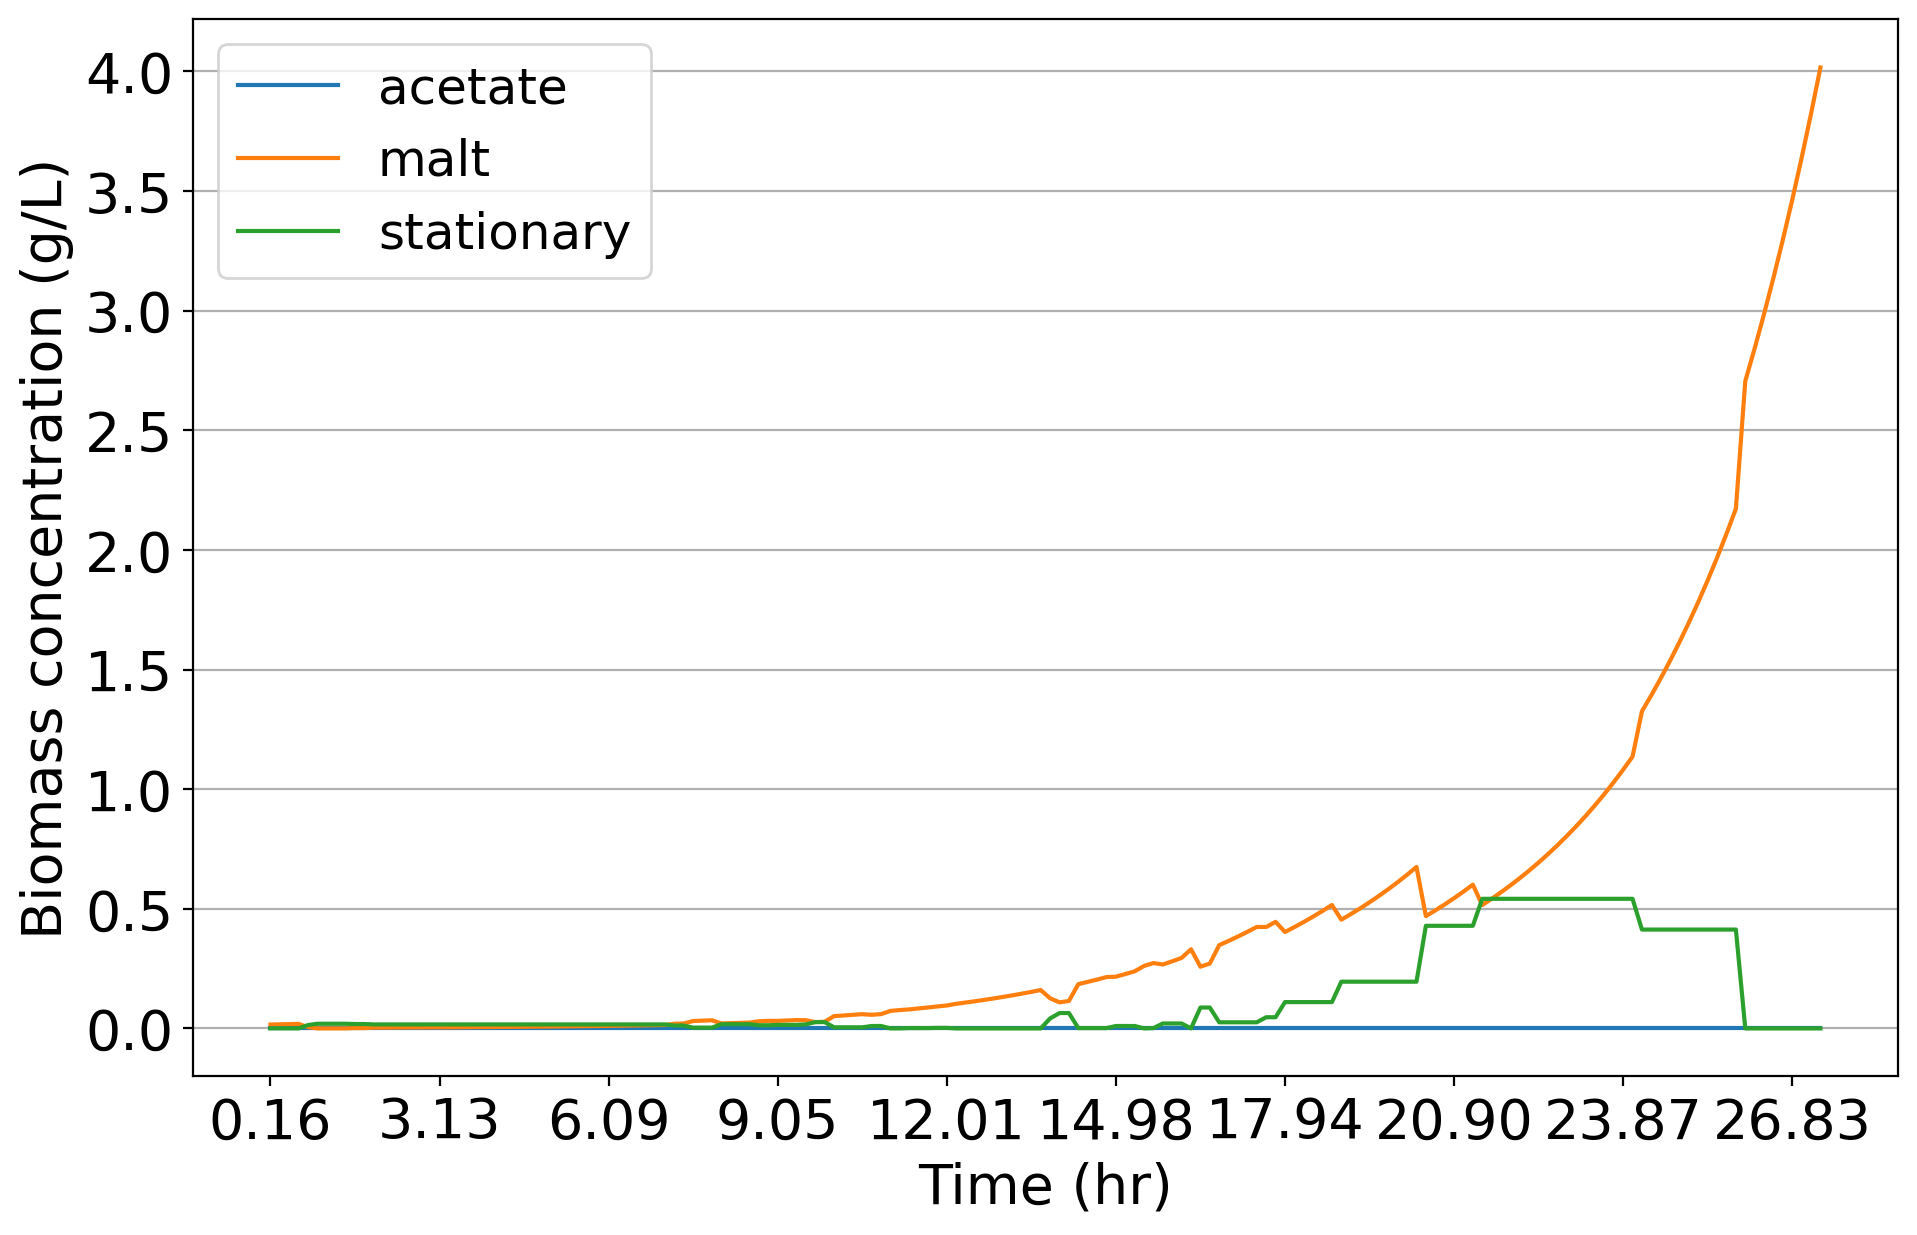

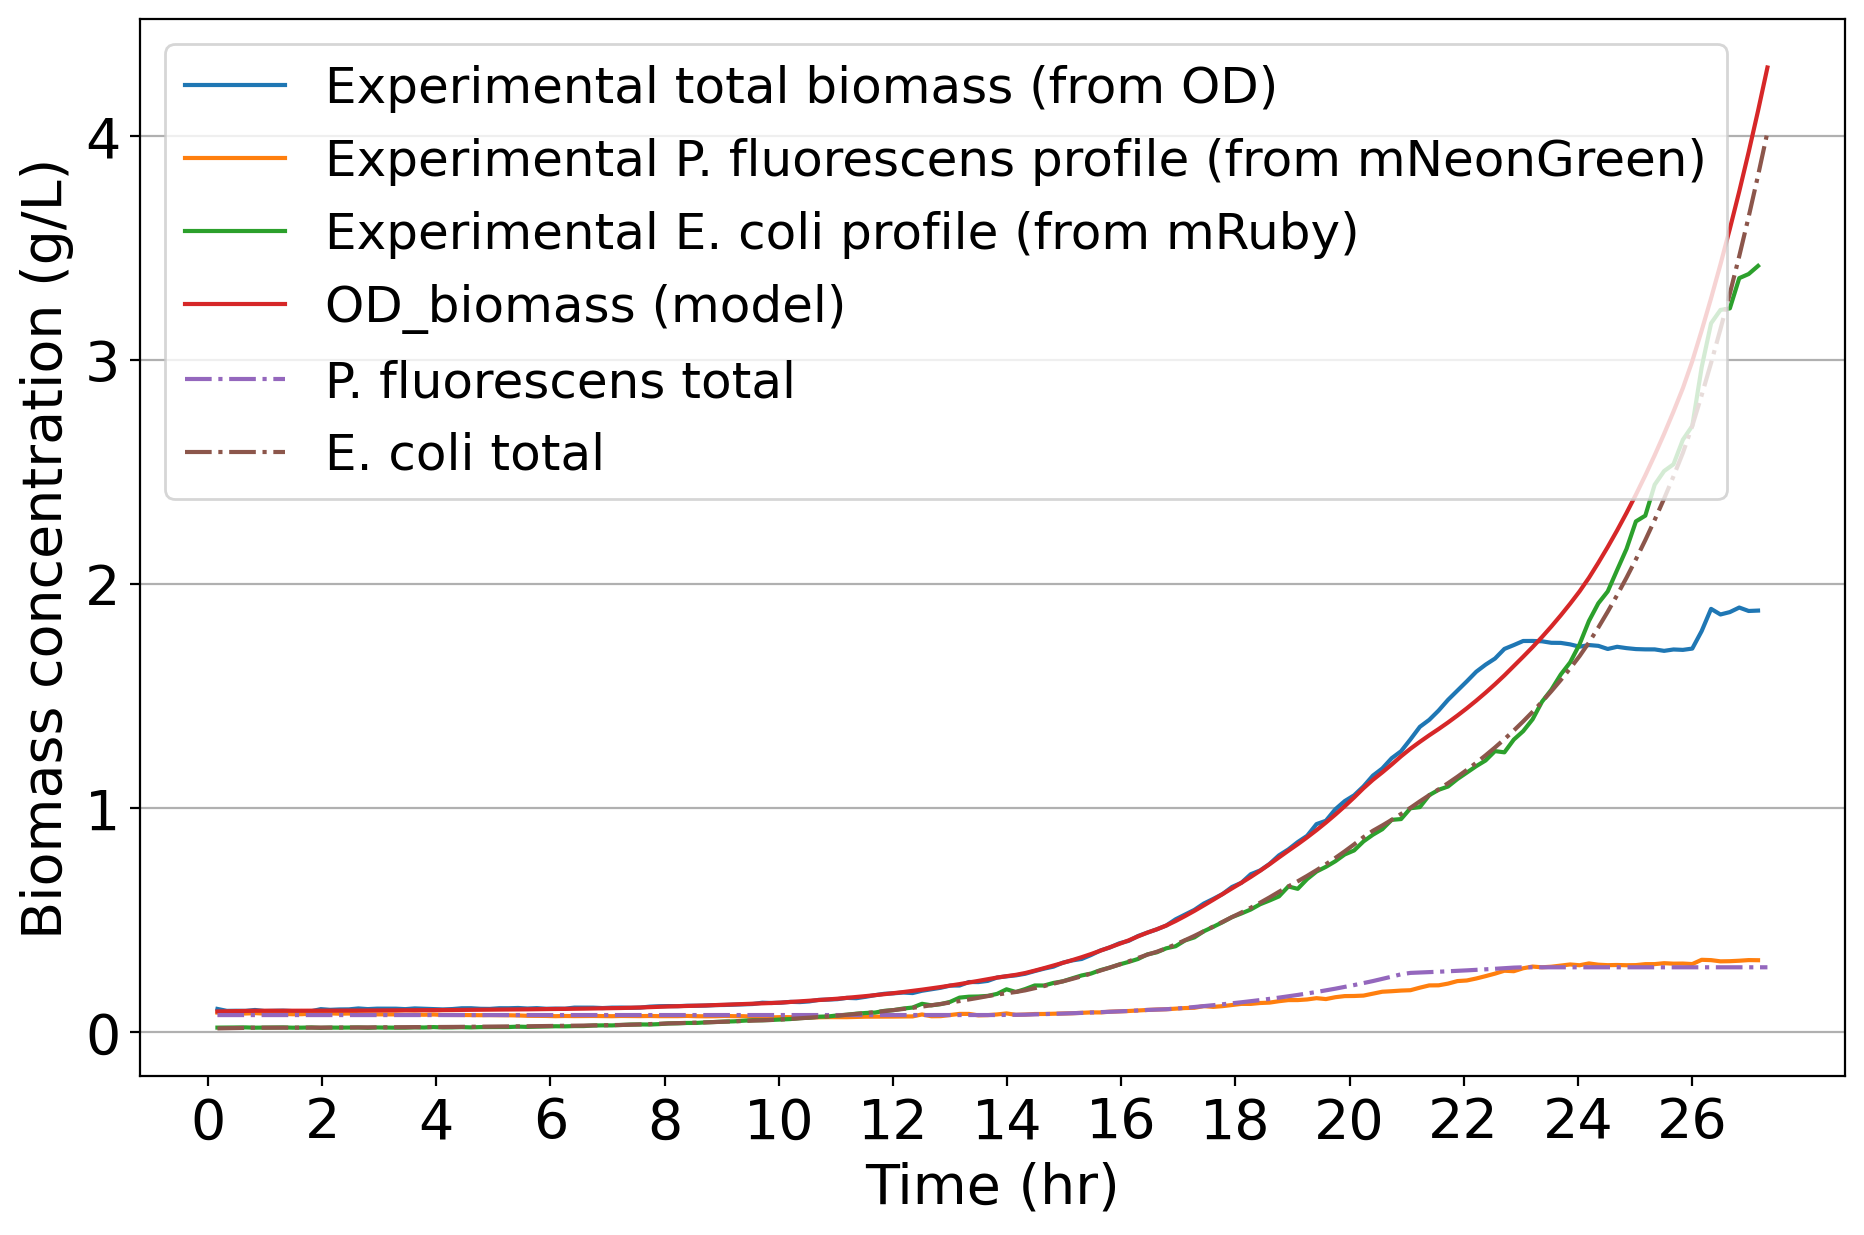

In [9]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     carbon_sources = {"cpd00179":0.2},
     zero_start=["cpd00029"],
       graphs = update_trial("G4"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

# Maltose+4HB

In [3]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', '

In [19]:
print([x for x in commfit.signal_species.values() if "OD" not in x])

['pf', 'ecoli']


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:97: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.003125 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.0049479166666666664 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.12526041666666668 min
Done exporting the content: 0.019270833333333334 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'acetate', 'stationary', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G48'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029', 'cpd00136'],
 'trial': 'G48'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'malt', 'acetate', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G48'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G48'}


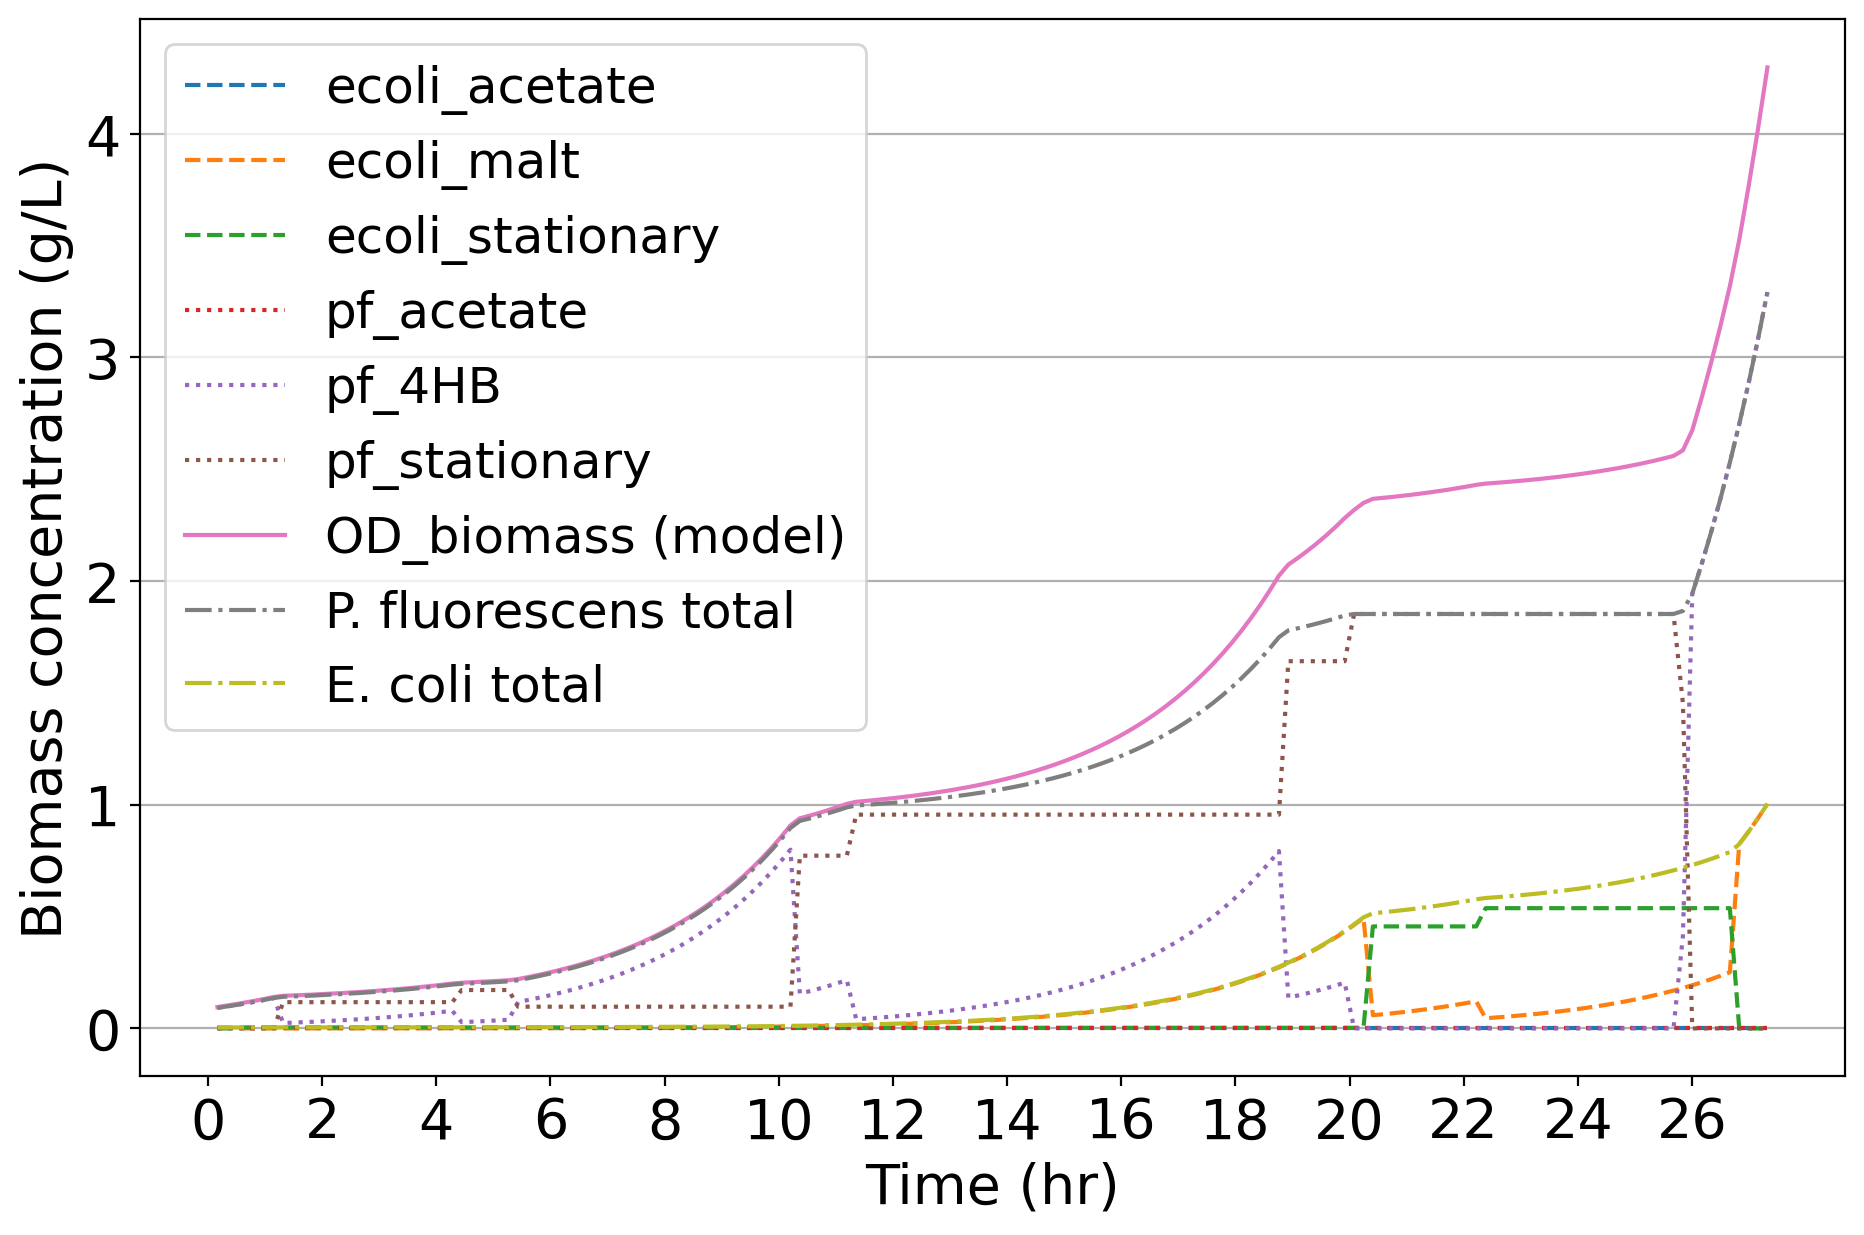

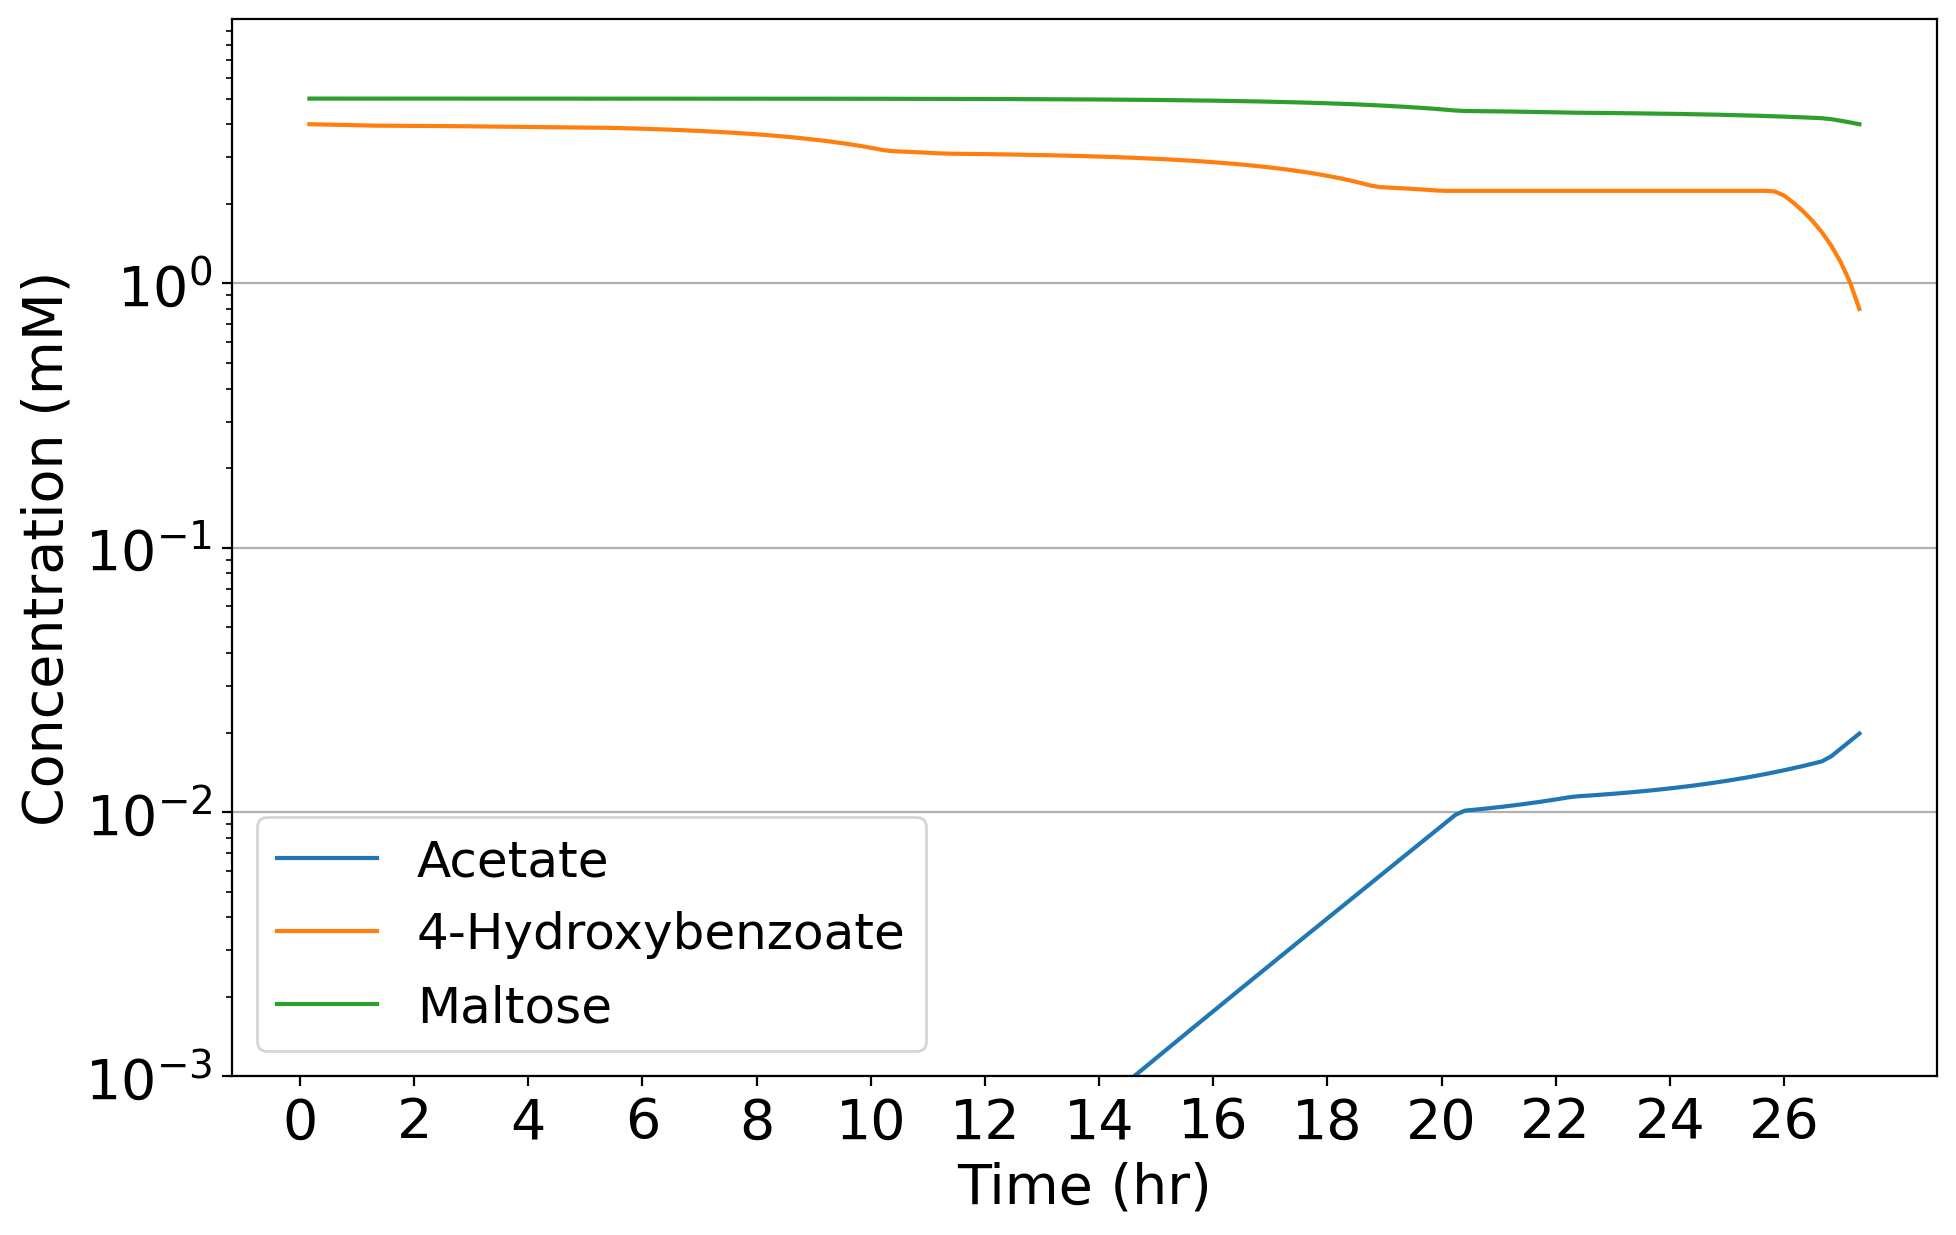

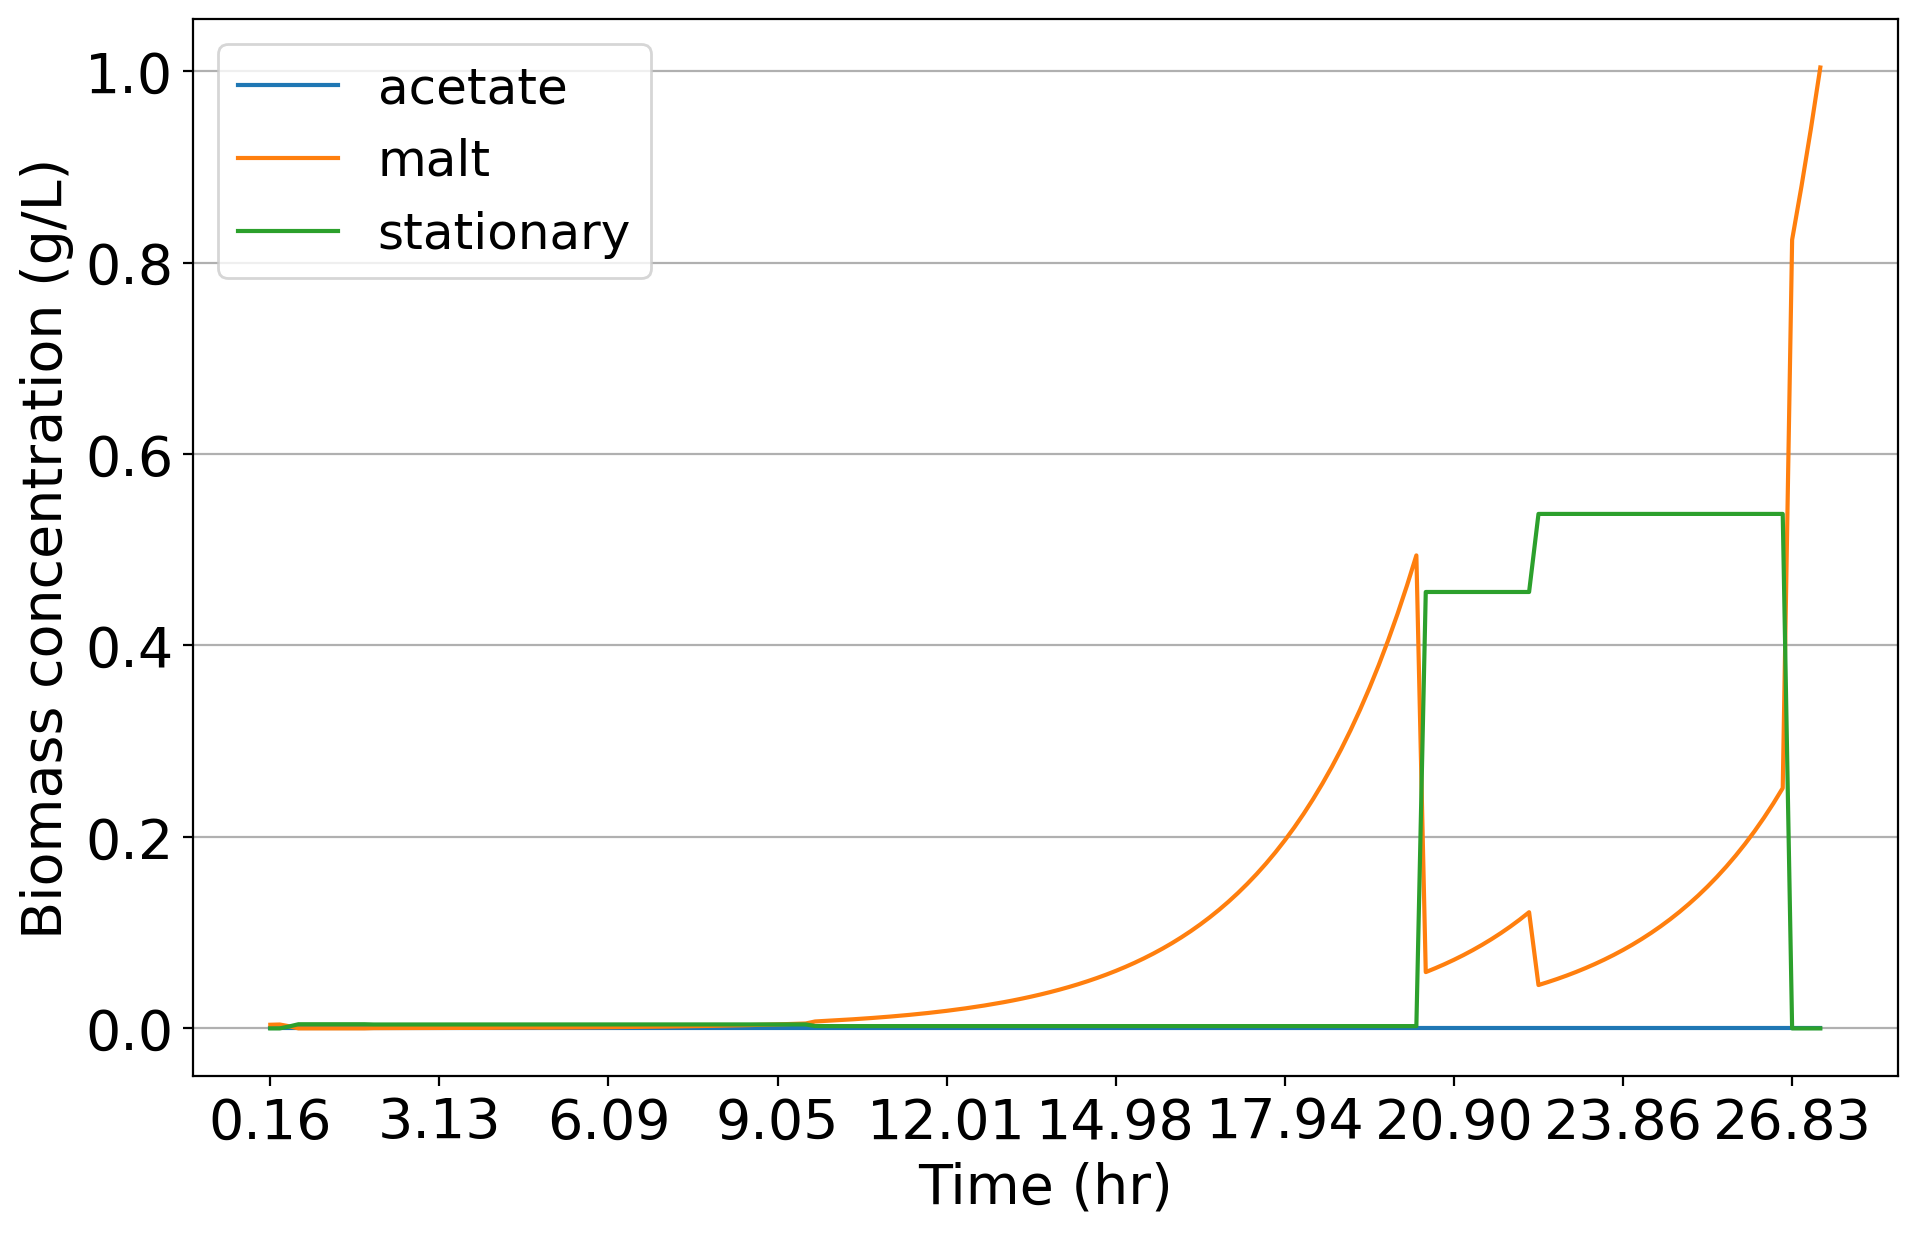

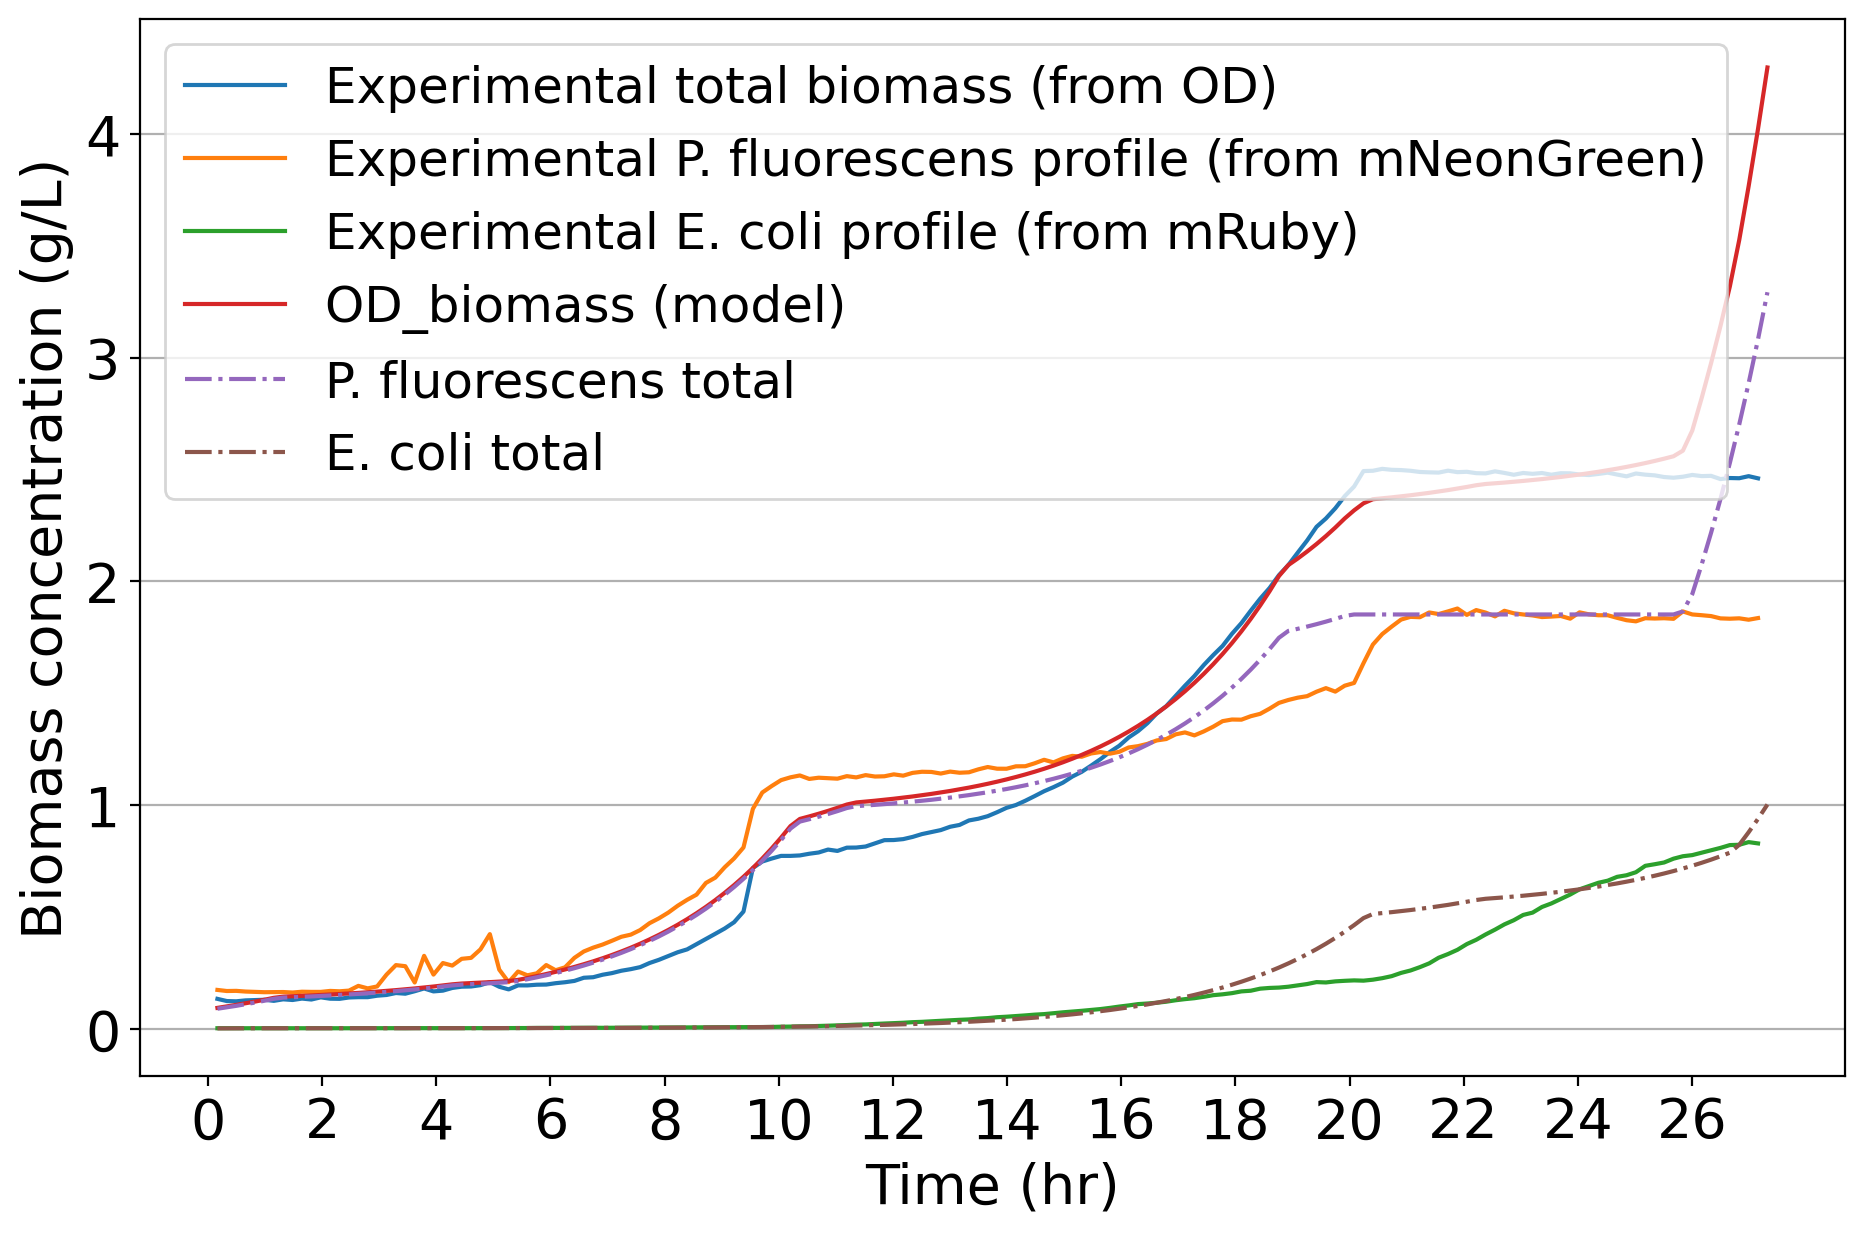

In [20]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.4,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
     carbon_sources = {"cpd00179":.8, "cpd00136":0.2},
     zero_start=["cpd00029"],
       graphs = update_trial("G48"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

# Acetate

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf', 'Fluorescence 1':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'columns': {
        'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3},
    }},
    ignore_trials = {'rows': ['C', 'D', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty 

The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B3', 'B4', 'B5', '

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:99: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


KeyError: 'Fluorescence 1'

In [ ]:
display(trial_name_conversion)
display(experimental_metadata)

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     final_rel_c12_conc = 0.1,
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
     zero_start=["cpd00029"],
       graphs = update_trial("G"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)